## Self-Driving Car Engineer Nanodegree - Deep Learning Module:
###  Dean Webb's "WebbNet" Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

---

### Step 1: Dataset Exploration - Summary

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!

##### <font color='red'> Question 1 - Done</font> ###

**_Describe the techniques used to preprocess the data._**

** <font color='blue'> Answer: </font> ** The main technique that I am thrilled to report is that I was able to successfully download and preprocess the raw image files straight from the German Traffic Sign Classifier Benchmark source: "http://benchmark.ini.rub.de/Dataset/" (347 MB). This allows me to much more flexibility for preprocessing. for example, I can change the resolution of all images that feed into my network by simply changing the "DEFAULT_RESOLUTION" tuple in my constants section below. Further, I can similarly utilize localization in the image by crop the image to the size of the bounding box. A combination of resizing and cropping hopefully will help to reduce (or introduce) noise in my dataset.

Lastly, I serialized and cached the dataset into a pickle file, utilizing the helper function provided. This is done by setting the refresh_datacache=True. The pickled data is a dictionary with 4 key/value pairs:
- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

My reasoning behind pulling from source is that I wanted expreience implementing developing a classifier where the dataset is not cleaned and pre-provided, so I researched the German Traffic Sign Recognition Dataset and investigated how the dataset was given to participants. I noticed that all they were given typically was a link to some zipfiles. So I wanted to mimic this and build an end-to-end classifier that-given a list of url links to datasets, it downloads, preprocesses and loads the dataset as objects.

Another rationale is tht I wanted to test out if different techniques considerably helped my model with all other things considered, like resizing, cropping, converting extensions, and converting color palletes. I wasn't aware of a simple way to do all things simultaneously across all datasets ( I was working with 5 at the time), so I built one. Although I found some useful tricks like being able to load a PIL Image object from a numpy array. Moving forward term, I plan to make the preprocessing engine a little more generic, it could be a useful open-source tool for data scientists who may want to process a file/directory based image data set. 

I did notice a slight increase in performance with all other things controlled for, specifically in the resizing area, I knew the images faced some distortion so I wondered if resizing to 64x64x3 would lead to in improvement. On average, I saw about a 2% increase in testing accuracy (~88% -> ~90%) When I implemented the preprocessing techniques, although this may not be statistically significant. 

##### <font color='red'> Question 2 - Done</font> ###

**_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_**

** <font color='blue'> Answer:</font> ** I wanted to really test out my the preprocessing of the RAW images vs the Udacity provided dataset, so I introduced a flag "use_raw_dataset" that alternates between the two datasets. I note that this flag is used in combination with the flag above in my "load_datasets" function to produce the following outcomes:
    
**<font color='blue'>use_raw_dataset=True, refresh_datacache=True</font>**  
    - Starts preprocessing from scratch utilizing the raw dataset Downloads from source, preprocesses, overwrites the datacache

**<font color='blue'>use_raw_dataset=True, refresh_datacache=False</font>**
    - Restores the dataset from the datacache. (Note, the refresh_datacache flag takes precedence, so if the flag is set to false. It uses the datacache currently stored with no preference to the source! This can be accomplished by including a "datasource" flag into the datacache) 

**<font color='blue'>use_raw_dataset=False, refresh_datacache=True</font>**
    - Starts preprocessing from scratch utilizing the Udacity dataset
    
**<font color='blue'>use_raw_dataset=False, refresh_datacache=False</font>**
    - Restores dataset from the datacache. (Note, the refresh_datacache flag takes precedence, so if the flag is set to false. It uses the datacache currently stored with no preference to the source! This can be accomplished by including a "datasource" flag into the datacache)

### Process Multiple Datasources Autonomously: RAW (ppm) images vs. PreProcessed Image Cache Comparison

In [20]:
print("""
Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x12576add8>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_PPM | Validation_Set | Number of image filenames vector length: (3920,)
Training_Set_Raw_PPM | Validation_Set | Number of classified labelnames vector length: (43, 2)
Training_Set_Raw_PPM | Validation_Set | Number of image examples in the set: 3920

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.

# Validation_Set Test

Accuracy on Training_Set_Raw_PPM | Validation_Set: 98.4% (3856 / 3920)
Iter:   5999, Train-Batch Avg Accuracy:  99.7%, Validation Accuracy:  98.4% **
epoch: 0018 mini-batch iteration: 0000 loss= 0.012390 log(loss)= -4.390854 accuracy= 1.000000
epoch: 0018 mini-batch iteration: 0100 loss= 0.012542 log(loss)= -4.378684 accuracy= 1.000000
epoch: 0018 mini-batch iteration: 0200 loss= 0.014761 log(loss)= -4.215753 accuracy= 1.000000
epoch: 0018 mini-batch iteration: 0300 loss= 0.012919 log(loss)= -4.349072 accuracy= 1.000000
total_iterations: 006352 epoch: 0018 avg_loss= 0.015543 avg_log_loss= -4.223557 avg_accuracy= 0.996996

# Test_set Test

Accuracy on Testing_Set_Raw_PPM: 89.6% (11321 / 12630)

""")


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x12576add8>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_PPM | Validation_Set | Number of image filenames vector length: (3920,)
Training_Set_Raw_PPM | Validation_Set | Number of classified labelnames vector length: (43, 2)
Training_Set_Raw_PPM | Validation_Set | Number of image examples in the set: 3920

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.

# Validation_Set Test

Accuracy on Training_Set_Raw_PPM | Validation_Set: 98.4% (3856 / 3920)
Iter:   5999, Train-Batch Avg Accuracy:  99.7%, Validation Accuracy:  98.4% **
epoch: 0018 mini-batch iteration: 0000 loss= 0.012390 log(loss)= -4.390854 accuracy= 1.000000
epoch: 0018 mini-batch iteration: 0100 loss= 0.012542 log(loss)= -4.378684 accuracy= 1.000000
epoch: 0018 mini-batc

### Validation_Set Child Dataset Object of Training_Set
Here's an exmple Dataset onject used for validation:

In order to get the raw (ppm) images processed, I use flags to filters between Source Images and Udacity Provided Dataset (as shown above). However, all datasets could be loaded autonamtically as well. The data sets are dynamically loaded into memory by some helper functions I made:
    - Preprocessing Engine
    - DataSet object
    - Optimization Instructor

### Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import os
import gzip
import urllib
import zipfile
import glob
from PIL import Image
import csv
import matplotlib.image as mpimg
import pickle
import shutil

### Constants

In [3]:
# Dataset Extraction
DE_TRAFFIC_SIGNS_SOURCE_URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/'
GTSRB_SOURCE_URL = 'http://benchmark.ini.rub.de/Dataset/'

# Image Processing
DEFAULT_LENGTH, DEFAULT_WIDTH, DEFAULT_DEPTH = (64, 64, 3)
DEFAULT_RESOLUTION = (DEFAULT_LENGTH, DEFAULT_WIDTH, DEFAULT_DEPTH) if DEFAULT_DEPTH > 1 else (DEFAULT_LENGTH, DEFAULT_WIDTH)
DEFAULT_IMG_EXTENSION = '.ppm'
DATASET_DIRECTORY = 'traffic-signs-data/'
DATACACHE_DIRECTORY = 'datacache/'
PRE_PROCESSED_ZIP = 'traffic-signs-data.zip'

# Training Dataset
TRAINING_SET_RAW_PPM = 'Training_Set_Raw_PPM'
TRAINING_SET_UDACITY = 'Training_Set_Udacity_Dict'
TRAIN_IMAGES_ZIP = 'GTSRB_Final_Training_Images.zip'
TRAIN_IMAGES_DIR = 'GTSRB/Final_Training/Images'

# Validation Dataset
VALIDATION_PORTION = 0.10 #Percentage of training_set reserved for the validation_set, used during auto-optimization.

# Testing Dataset
TESTING_SET_RAW_PPM = 'Testing_Set_Raw_PPM'
TESTING_SET_UDACITY = 'Testing_Set_Udacity_Dict'
TEST_IMAGES_ZIP = 'GTSRB_Final_Test_Images.zip'
TEST_IMAGES_DIR = 'GTSRB/Final_Test/Images'
TEST_LABELS_ZIP = 'GTSRB_Final_Test_GT.zip'
TESTING_LABELS_CSV = 'GT-final_test.csv'

# Custom Testing Dataset
CUSTOM_TESTING_SET_RAW_PPM = 'Custom_Testing_Set_Raw_PPM'
CUSTOM_TEST_IMAGES_ZIP = 'resources_Custom_Set_Images.zip'
CUSTOM_TEST_IMAGES_DIR = 'resources/Custom_Set/Images'
CUSTOM_TESTING_LABELS_CSV = 'custom_set_annotations.csv'

CLASSIFIED_LABELS_CSV = 'signnames.csv'

### Helper Module: Preprocessing Engine: 
Module for downloading, extracting, processing, and loading the Datasets. Currently supports multiple datasets that can function as a training_Set with a validation subset, or a testing_set with a classify_test_set function. 
- The pre-processed, Udacity provided dataset from "https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip"    (121 MB)

- And the corresponding raw data set from http://benchmark.ini.rub.de/Dataset/ (347 MB)

In [4]:
def maybe_download(filename, work_directory, use_raw_dataset=True):
    filepath = os.path.join(work_directory, filename)
    if use_raw_dataset:
        SOURCE_URL = GTSRB_SOURCE_URL
    else:
        SOURCE_URL = DE_TRAFFIC_SIGNS_SOURCE_URL

    if not os.path.exists(work_directory):
        os.mkdir(work_directory)
        filepath = os.path.join(work_directory, filename)
    if not os.path.exists(os.path.join(work_directory, filename)) or not os.path.exists(filepath):
        filepath, _ = urllib.request.urlretrieve(SOURCE_URL + filename, filepath)
        statinfo = os.stat(filepath)
        print('')
        print('Succesfully downloaded:', filepath, '| % d MB.' % int(statinfo.st_size*1e-6))
    return filepath

def _read32(bytestream):
    dt = np.dtype(np.uint32).newbyteorder('>')
    return np.frombuffer(bytestream.read(4), dtype=dt)

def unzip_file(source, new_filename, destination):
    root, ext = os.path.splitext(new_filename)
    if not os.path.exists(os.path.join(destination, new_filename)) or (len(ext) > 0):
        print('File does not exist: ', os.path.join(destination, new_filename), ': Extracting')
        zipf = zipfile.ZipFile(os.path.join(source,new_filename))
        print('Loaded zipf',zipf, ': Extracting')
        zipf.extractall(destination)
        zipf.close()

def read_csv(filepath, num_features = (8), delimiter=';', label_column=7):
    data_array = np.array(np.zeros(shape=num_features))
    with open(filepath, newline='') as csvfile:
        annotations_reader = csv.reader(csvfile, delimiter=delimiter, quotechar='|')
        for row in annotations_reader:
            if row[label_column].isdigit():
                data_array = np.vstack((data_array, np.array(row)))
    return data_array[1:]

# Optionally returns a list of images of corresponding filepaths
def resize_images(filepaths, return_data=True):
    # TODO: Add cropping from bounding box
    images = []
    labels = [] if return_data else None
    file_names = np.array(np.zeros(shape=(1)))

    for current_img in filepaths:
        if os.path.exists(current_img) and DEFAULT_IMG_EXTENSION in current_img:
            img = Image.open(current_img)
            if img.mode != 'RGB':
                img = img.convert('RGB')
                img.save(current_img)
            if ((img.size) != (DEFAULT_LENGTH, DEFAULT_LENGTH)):
                img = img.resize(DEFAULT_RESOLUTION[0:2], Image.ANTIALIAS)
            img.save(current_img)
            img.close()
            images.extend([mpimg.imread(str(current_img))])
            split_paths = os.path.split(current_img) 
            label_path = os.path.split(split_paths[0])[1]
            if return_data and label_path.isdigit() and len(label_path) == 5:
                labels.extend([int(label_path)])
                np.vstack((file_names, np.array(split_paths[1])))
            else:
                file_names = np.vstack((file_names, split_paths[1]))
        else:
            print("File {0} is not an image with extension: {1}! Skipping..".format(
                  current_img, DEFAULT_IMG_EXTENSION))
    if return_data:
        return (np.array(images), np.reshape(file_names[1:], (-1)), labels)
    
def extract_label_names():
    annotations = read_csv(os.path.join(CLASSIFIED_LABELS_CSV), num_features = (2), delimiter=',', label_column=0)
    return annotations

def exclude_hidden_files(path):
    return glob.glob(os.path.join(path, '*'))

def extract_preprocessed_data(filename, work_directory):
    if not os.path.exists(work_directory):
        os.mkdir(work_directory)
    datacache_directory = os.path.join(work_directory, DATACACHE_DIRECTORY)
    if not os.path.exists(datacache_directory):
        os.mkdir(datacache_directory)
    head, tail = os.path.split(filename)
    print('unzipping file:', tail, 'to directory:', datacache_directory)
    unzip_file(head, tail, datacache_directory)
    return datacache_directory

def extract_training_data(filename, work_directory, images_path):
    #Unzip File
    head, tail = os.path.split(filename)
    print('unzipping file:', tail, 'to directory:', work_directory)
    unzip_file(head, tail, work_directory)
        
    #Traverse Directories and load Dataset
    images_path_dir = os.listdir(os.path.join(work_directory, images_path))
    label_array = []
    filename_array = []
    data = np.array([np.zeros(shape=DEFAULT_RESOLUTION)])
    for label_path in images_path_dir:
        working_dir= os.path.join(work_directory, images_path, label_path)

        if os.path.exists(os.path.join(working_dir, '/')):
            filenames = np.array([os.path.join(working_dir, path) for path
                           in os.listdir(working_dir) if DEFAULT_IMG_EXTENSION in path
                                  and ")" not in path and "(" not in path 
                                  and os.path.exists(os.path.join(working_dir, path))])         
            images_batch, filenames_batch, labels_batch = resize_images(filenames)
            if images_batch.shape[1:] == DEFAULT_RESOLUTION:
                data = np.vstack((data, images_batch))
            filename_array.extend(filenames_batch)
            label_array.extend(labels_batch)

    return (data[1:], label_array, filename_array)
        
def extract_testing_data(filename, work_directory, images_path):
    #Unzip File
    head, tail = os.path.split(filename)
    print('unzipping file:', tail, 'to directory:', work_directory)
    unzip_file(head, tail, work_directory)

    #Extract testing labels from TESTING_LABELS_CSV
    local_test_label_path = maybe_download(TEST_LABELS_ZIP, work_directory)
    if not os.path.exists(os.path.join(work_directory, images_path, TESTING_LABELS_CSV)):
        print('File does not exist: ', os.path.join(work_directory, images_path, TESTING_LABELS_CSV), ': Extracting')
        zipf = zipfile.ZipFile(local_test_label_path)
        print('Loaded zipf',zipf, ': Extracting')
        zipf.extractall(os.path.join(work_directory, images_path))
        zipf.close()
    annotations = read_csv(os.path.join(work_directory, images_path, TESTING_LABELS_CSV))
    
    #Traverse Directories and load Dataset
    images_path = exclude_hidden_files(os.path.join(work_directory, images_path))
    data = [np.array(np.zeros(shape=DEFAULT_RESOLUTION))]
    filenames = np.array([path for path
                           in images_path if DEFAULT_IMG_EXTENSION in path
                                  and ")" not in path and "(" not in path and os.path.exists(path)])
    images_batch, filenames_batch, _ = resize_images(filenames, return_data=True)
    labels_batch = np.array([int(label) for label in annotations[:,7] if np.chararray.isdigit(label)])
    
    #Load Labels from filename
    labels = np.array(np.zeros(shape=(1)))
    for filename in filenames_batch:
        label_index = np.nonzero( annotations[:,0] == filename) 
        label = annotations[:,7][label_index]
        labels= np.vstack((labels, label))
    
    return (images_batch, np.reshape(labels[1:], (-1)), filenames_batch)

def extract_custom_testing_data(filename, work_directory, images_path):
    #Unzip File
    head, tail = os.path.split(filename)
    print(head, 'unzipping file:', tail, 'to directory:', work_directory)
    unzip_file(head, tail, work_directory)

    annotations = read_csv(os.path.join(work_directory, images_path, CUSTOM_TESTING_LABELS_CSV),
                           num_features = (2), delimiter=',', label_column=1)
    
    #Walk Directories and load Dataset
    images_path = exclude_hidden_files(os.path.join(work_directory, images_path))
    data = [np.array(np.zeros(shape=DEFAULT_RESOLUTION))]
    filenames = np.array([path for path
                           in images_path if DEFAULT_IMG_EXTENSION in path
                                  and ")" not in path and "(" not in path and os.path.exists(path)])
    images_batch, filenames_batch, _ = resize_images(filenames, return_data=True)
    labels_batch = np.array([int(label) for label in annotations[:,1] if np.chararray.isdigit(label)])
    
    #Load Labels from filename
    labels = np.array(np.zeros(shape=(1)))
    for filename in filenames_batch:
        label_index = np.nonzero( annotations[:,0] == filename) 
        label = annotations[:,1][label_index]
        labels= np.vstack((labels, label))
    
    return (images_batch, np.reshape(labels[1:], (-1)), filenames_batch)

def restore_from_datacache(datacache_dir):
    training_file = os.path.join(datacache_dir,"train.p")
    testing_file = os.path.join(datacache_dir, "test.p") 
    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
    X_test, y_test = test['features'], test['labels']
    X_name, y_name = train['name'], test['name']
    
    if train['validation_set'] is not None or train['validation_set'] != {}:
        X_train, X_validate, y_train = train['features'], train['validation_set'], train['labels']
        return (X_train, X_validate, y_train, X_test, y_test, X_name, y_name)
    else:
        X_train, y_train = train['features'], train['labels']
        return (X_train, _, y_train, X_test, y_test, X_name, y_name)

def overwrite_datacache(training_set, testing_set, datacache_dir):
    if os.path.exists(datacache_dir):
        shutil.rmtree(datacache_dir, ignore_errors=True)
    os.mkdir(datacache_dir)
    training_file = os.path.join(datacache_dir,"train.p")
    testing_file = os.path.join(datacache_dir, "test.p") 
    if training_set.validation_set is not None or training_set.validation_set == training_set.validation_set:
        train = { 'name': training_set.name, 'features': training_set.images, 'labels': training_set.labels, 
             'validation_set': training_set.validation_set }
    else:
        train = { 'name': training_set.name, 'features': training_set.images, 'labels': training_set.labels }
    test = { 'name': testing_set.name, 'features': testing_set.images, 'labels': testing_set.labels }
    pickle.dump(train, open(training_file, "wb"))
    pickle.dump(test, open(testing_file, "wb"))

### Helper Class: Generic Dataset  
Helper class for storing an array of Dataset used for processessing. The Datasets are loaded after all of the files are preprocessed (downloaded, extracted, processed. Currently supports any generic dataset, provided the images follow the same directory structure. Below, I used the raw test-set collected from the site and used a mini-batch test_set of 100 hand selected imaged from Google. Those images were screen-captured from Google images and loaded in a directory similar to the GTSRB structure. 

I also attempted to find a distribution in this sample set to get a good sample size.  datasets that can function as a training_Set with a validation subset, or a testing_set with a classify_test_accuracy. 

In [5]:
class DataSet(object):
    def __init__(self, images, labels, filenames, labelnames, name='Training_Set',
                 validation_portion = 0.0, validation_set=None):
        images = images.astype(np.float32)
        labels = labels.astype(np.int_)
        
        if validation_set is not None or validation_portion > 0.0:
            self._validation_set = validation_set
        else:
            self._validation_set = None
            images = np.multiply(images, 1.0 / 255.0) # Scale on first load to help with normalization. 
        if filenames.shape[0] == 0:
            filenames = np.array(np.zeros_like(labels))
        if labelnames.shape[0] == 0:
            labelnames = np.array(np.zeros_like(labels))
            
        self._num_examples = len(images)
        self._images = images
        self._labels = labels  
        self._epochs_completed = 0
        self._index_in_epoch = 0
        self._avg_training_accuracy = 0.0
        self._validation_accuracy = 0.0
        self._filenames = filenames
        self._labelnames = labelnames
        self._name = name
        
        #Shuffle Data
        perm = np.arange(self._num_examples)
        np.random.shuffle(perm)
        self._images = self._images[perm]
        self._labels = self._labels[perm]
        self._filenames = self._filenames[perm]
        
        if validation_portion > 0.0: # This variable overwrites the validation
            self._validation_set = self.create_validation_set(validation_portion=validation_portion)
        
        self.print_loading_report()
        
    @property
    def images(self):
        return self._images
    @property
    def name(self):
        return self._name
    @property
    def filenames(self):
        return self._filenames
    @property
    def labelnames(self):
        return self._labelnames
    @property
    def labels(self):
        return self._labels    
    @property
    def num_examples(self):
        return self._num_examples
    @property
    def epochs_completed(self):
        return self._epochs_completed
    @property
    def iterations_completed(self):
        return self.iterations_completed
    @property
    def is_optimized(self):
        return self._is_optimized
    @property
    def avg_training_accuracy(self):
        return self._avg_training_accuracy
    @property
    def validation_accuracy(self):
        return self._validation_accuracy
    @property
    def validation_set(self):
        if self._validation_set is None:
            _validation_set = self.create_validation_set()
        return self._validation_set
    
    def set_training_accuracy(self, avg_training_accuracy):
        self._avg_training_accuracy = avg_training_accuracy

    def set_validation_accuracy(self, validation_accuracy):
        self._validation_accuracy = validation_accuracy
    
    def create_validation_set(self, validation_portion=.10):
        #Create validation set from training_set based on validation_portion.
        assert validation_portion < 1.0
        validation_size = int(self._num_examples*validation_portion)
        self._validation_size = validation_size
        self._num_examples = self._num_examples - self._validation_size
        
        validation_size = validation_size*-1
        images = self._images[validation_size:]
        self._images = self._images[:validation_size]
        labels = self._labels[validation_size:]
        self._labels = self._labels[:validation_size]
        filenames = self._filenames[validation_size:]
        self._filenames = self._filenames[:validation_size]
            
        return {'images': images, 'labels': labels, 'filenames': filenames,
                'num_examples': -1*validation_size}
    
    def print_validation_report(self, show_example_images=True):
        print(self._name, '|', 'validation_set[\'images\'] shape:', self._validation_set['images'].shape)
        print(self._name, '|', 'validation_set[\'labels\'] shape:', self._validation_set['labels'].shape)
        print(self._name, '|', 'validation_set[\'filenames\'] shape:', self._validation_set['filenames'].shape)
        print(self._name, '|', 'validation_set[\'num_examples\'] shape:', self._validation_set['num_examples'])
        validation_imgs = self._validation_set['images']
        if show_example_images:
            self.plot_images(images=validation_imgs[:9])
    
    def next_batch(self, batch_size, with_label = False):
        #Return the next `batch_size` examples from this Dataset.
        start = self._index_in_epoch
        self._index_in_epoch += batch_size
        if self._index_in_epoch > self._num_examples:
            # Finished epoch
            self._epochs_completed += 1
            # Shuffle the data
            perm = np.arange(self._num_examples)
            np.random.shuffle(perm)
            self._images = self._images[perm]
            self._labels = self._labels[perm]
            self._filenames = self._filenames[perm]
            # Start next epoch
            start = 0
            self._index_in_epoch = batch_size
            assert batch_size <= self._num_examples
        end = self._index_in_epoch
        if with_label == True:
            return self._images[start:end], self._labels[start:end]
        return self._images[start:end]
    
    def get_labelname(self, label_id):
        return self._labelnames[label_id][1]
    
    def distort_batch(self, batch):
        #TODO: Fix distort_batch (return statements from above)
                    #return self.distort_batch(self._images[start:end]), self._labels[start:end], self._filenames[start:end]
        #return self.distort_batch(self._images[start:end])
        
        batch_size = len(batch)
        row_distort = np.random.randint(0, 3, batch_size)
        col_distort = np.random.randint(0, 3, batch_size)
        result = np.zeros(shape=(batch_size, DEFAULT_LENGTH, DEFAULT_WIDTH, DEFAULT_DEPTH), dtype=np.float32)
        for i in range(batch_size):
            result[i, :, :, :] = batch[i, row_distort[i]:row_distort[i]+DEFAULT_LENGTH, col_distort[i]:col_distort[i]+DEFAULT_WIDTH, :]
        return result

    def plot_images(self, cls_pred=None, images=None):
        if images is None:
                images=self.images[:9]
        else:
            images=images
                
        # Create figure with 3x3 sub-plots.
        fig, axes = plt.subplots(3, 3)
        multiplier = 1.1
        fig.subplots_adjust(hspace=2.0*multiplier, wspace=3.5*multiplier)

        for i, ax in enumerate(axes.flat):
            #TODO: Fix scaling issue in restore datacache (Scaled down during Dataset initialization.
            #images = np.multiply(images, 255.0)

            # Plot image.
            ax.imshow(images[i])

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "Actual: {0:.20}".format(self.get_labelname(self._labels[i]))
            else:
                xlabel = "Pred: {0:.19} \nTrue: {1:.19}".format(self.get_labelname(cls_pred[i]),self.get_labelname(self._labels[i]))

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)

            # Remove ticks from the plot.
            ax.set_xticks([])
            ax.set_yticks([])
        plt.show()
    
    def show_example_images(self):        
        self.plot_images()
    
    def shuffle_data(self):
        perm = np.arange(self._num_examples)
        np.random.shuffle(perm)
        self._images = self._images[perm]
        self._labels = self._labels[perm]
        self._filenames = self._filenames[perm]
        
    def print_loading_report(self):
        print('')
        print('Dataset: "', self._name,'" successfully loaded to memory location:', self)
        print(self._name,'|', "Images tensor shape:", self.images.shape)
        print(self._name,'|', "Labels vector length:",self.labels.shape)
        print(self._name,'|', "Number of image filenames vector length:",self.filenames.shape)
        print(self._name,'|', "Number of classified labelnames vector length:",self.labelnames.shape)
        print(self._name,'|', "Number of image examples in the set:",self.num_examples)
        assert self.images.shape[0] == self.labels.shape[0], "The images/labels must match in the Dataset!\n"
    
        self.show_example_images()
        
        #Print Validation dimensions if validation_set
        if self._validation_set is not None and self._validation_set != {}:
            self.print_validation_report(show_example_images=True)        
        print('Loading report for',self._name,'concluded.')

    def load_datasets(use_raw_dataset=True, refresh_datacache=True):
        working_dir = DATASET_DIRECTORY
        datacache_dir = os.path.join(working_dir, DATACACHE_DIRECTORY)
        labelnames = extract_label_names()
        
        cust_test_images, cust_test_labels, cust_test_filenames = extract_custom_testing_data(
            CUSTOM_TEST_IMAGES_ZIP, working_dir, CUSTOM_TEST_IMAGES_DIR)
        custom_testing_set = DataSet(cust_test_images, cust_test_labels, cust_test_filenames,
                                     labelnames, name=CUSTOM_TESTING_SET_RAW_PPM)
        
        #Determine which Datasets to load    
        if use_raw_dataset:
            if  refresh_datacache:
                # Extract Training Data
                local_path = maybe_download(TRAIN_IMAGES_ZIP, working_dir, use_raw_dataset=True)
                train_images, train_labels, train_filenames = extract_training_data(local_path, working_dir,
                                                                                    TRAIN_IMAGES_DIR)
                # Extract Testing Data
                local_path = maybe_download(TEST_IMAGES_ZIP, working_dir, use_raw_dataset=True)
                test_images, test_labels, test_filenames = extract_testing_data(local_path, working_dir,
                                                                                TEST_IMAGES_DIR)
                # Load Datasets
                training_set = DataSet(train_images, np.array(train_labels), np.array(train_filenames), labelnames, 
                                       validation_portion = VALIDATION_PORTION, name=TRAINING_SET_RAW_PPM)
                testing_set = DataSet(test_images, test_labels, test_filenames, labelnames, name=TESTING_SET_RAW_PPM) 
                # Overwrite Pickle File
                overwrite_datacache(training_set, testing_set, datacache_dir)
            else:
                # Extract Dataset from Pickle file
                train_images,validation_set,train_labels,test_images,test_labels,train_name,test_name = restore_from_datacache(
                    datacache_dir)
                train_filenames, test_filenames = (np.array([]), np.array([]))
                # Load Datasets
                training_set = DataSet(train_images, train_labels, train_filenames, labelnames, name=train_name,
                                       validation_portion=VALIDATION_PORTION, validation_set=validation_set)
                testing_set = DataSet(test_images, test_labels, test_filenames, labelnames, name=train_name,)
        elif refresh_datacache:
            # Remove Datacache
            if os.path.exists(datacache_dir):
                shutil.rmtree(datacache_dir, ignore_errors=True)
                os.mkdir(datacache_dir)
            # Extract Preprocessed Data   
            local_path = maybe_download(PRE_PROCESSED_ZIP, working_dir, use_raw_dataset=False)
            datacache_dir = extract_preprocessed_data(local_path, working_dir)
            train_images,validation_set,train_labels,test_images,test_labels,_,_ = restore_from_datacache(
                datacache_dir)
            train_filenames, test_filenames = (np.array([]), np.array([]))
            # Load Datasets
            training_set = DataSet(train_images, train_labels, train_filenames, labelnames, name=TRAINING_SET_UDACITY,
                                   validation_portion = VALIDATION_PORTION, validation_set=validation_set)
            testing_set = DataSet(test_images, test_labels, test_filenames, labelnames, name=TESTING_SET_UDACITY)
            overwrite_datacache(training_set, testing_set, datacache_dir)
        else:
            # Extract Dataset from Pickle file
            train_images,validation_set,train_labels,test_images,test_labels,train_name,test_name = restore_from_datacache(
                datacache_dir)
            train_filenames, test_filenames = (np.array([]), np.array([]))
            # Load Datasets
            training_set = DataSet(train_images, train_labels, train_filenames, labelnames, name=train_name,
                                   validation_portion = VALIDATION_PORTION, validation_set=validation_set)
            testing_set = DataSet(test_images, test_labels, test_filenames, labelnames, name=test_name)
            
        return (training_set, [testing_set, custom_testing_set])


# Load DataSets and Report Data Dimensions
The data dimensions are used in several places in the model below. They are defined once so we can use these variables instead of numbers throughout the code.

 unzipping file: resources_Custom_Set_Images.zip to directory: traffic-signs-data/
File does not exist:  traffic-signs-data/resources_Custom_Set_Images.zip : Extracting
Loaded zipf <zipfile.ZipFile filename='resources_Custom_Set_Images.zip' mode='r'> : Extracting

Dataset: " Custom_Testing_Set_Raw_PPM " successfully loaded to memory location: <__main__.DataSet object at 0x104635be0>
Custom_Testing_Set_Raw_PPM | Images tensor shape: (100, 64, 64, 3)
Custom_Testing_Set_Raw_PPM | Labels vector length: (100,)
Custom_Testing_Set_Raw_PPM | Number of image filenames vector length: (100,)
Custom_Testing_Set_Raw_PPM | Number of classified labelnames vector length: (43, 2)
Custom_Testing_Set_Raw_PPM | Number of image examples in the set: 100


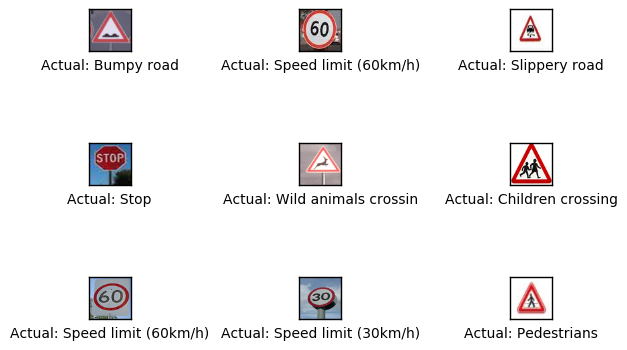

Loading report for Custom_Testing_Set_Raw_PPM concluded.
unzipping file: GTSRB_Final_Training_Images.zip to directory: traffic-signs-data/
File does not exist:  traffic-signs-data/GTSRB_Final_Training_Images.zip : Extracting
Loaded zipf <zipfile.ZipFile filename='traffic-signs-data/GTSRB_Final_Training_Images.zip' mode='r'> : Extracting
unzipping file: GTSRB_Final_Test_Images.zip to directory: traffic-signs-data/
File does not exist:  traffic-signs-data/GTSRB_Final_Test_Images.zip : Extracting
Loaded zipf <zipfile.ZipFile filename='traffic-signs-data/GTSRB_Final_Test_Images.zip' mode='r'> : Extracting
File does not exist:  traffic-signs-data/GTSRB/Final_Test/Images/GT-final_test.csv : Extracting
Loaded zipf <zipfile.ZipFile filename='traffic-signs-data/GTSRB_Final_Test_GT.zip' mode='r'> : Extracting

Dataset: " Training_Set_Raw_PPM " successfully loaded to memory location: <__main__.DataSet object at 0x10e4d8160>
Training_Set_Raw_PPM | Images tensor shape: (35289, 64, 64, 3)
Training_S

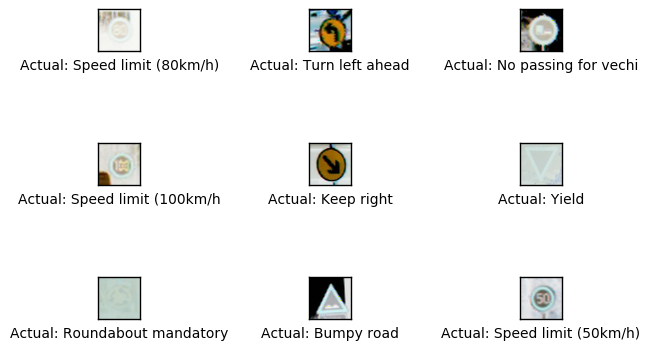

Training_Set_Raw_PPM | validation_set['images'] shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | validation_set['labels'] shape: (3920,)
Training_Set_Raw_PPM | validation_set['filenames'] shape: (3920,)
Training_Set_Raw_PPM | validation_set['num_examples'] shape: 3920


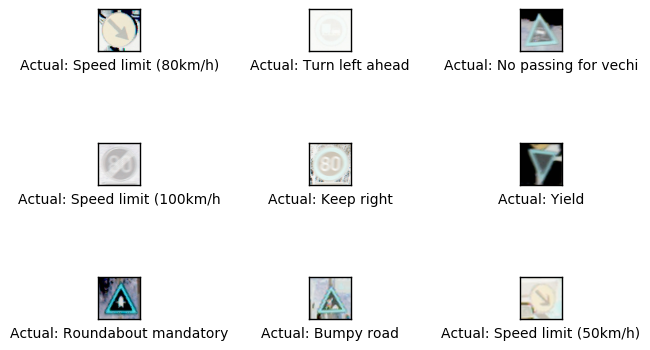

Loading report for Training_Set_Raw_PPM concluded.

Dataset: " Testing_Set_Raw_PPM " successfully loaded to memory location: <__main__.DataSet object at 0x105c38e80>
Testing_Set_Raw_PPM | Images tensor shape: (12630, 64, 64, 3)
Testing_Set_Raw_PPM | Labels vector length: (12630,)
Testing_Set_Raw_PPM | Number of image filenames vector length: (12630,)
Testing_Set_Raw_PPM | Number of classified labelnames vector length: (43, 2)
Testing_Set_Raw_PPM | Number of image examples in the set: 12630


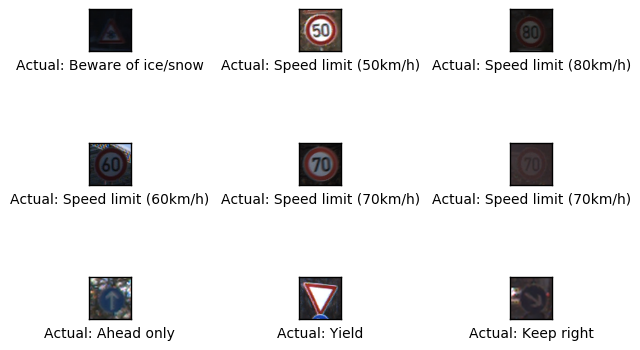

Loading report for Testing_Set_Raw_PPM concluded.


In [6]:
#Load Datasets
training_set, testing_sets = DataSet.load_datasets(use_raw_dataset=True, refresh_datacache=True)


----

### Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

## Architecture

### Helper Class: <font color='green'> Batch Normalization</font>

In [7]:
class batch_norm(object):
    def __init__(self, batch_size, epsilon=1e-5, momentum = 0.1, name="batch_norm"):
        with tf.variable_scope(name) as scope:
            try:
                self.epsilon = epsilon
                self.momentum = momentum
                self.batch_size = batch_size

                self.ema = tf.train.ExponentialMovingAverage(decay=self.momentum)
                self.name=name
            except ValueError:
                scope.reuse_variables()
                self.epsilon = tf.get_variable('epsilon')
                self.momentum = tf.get_variable('momentum')
                self.batch_size = tf.get_variable('batch_size')
                self.ema = tf.train.ExponentialMovingAverage(decay=self.momentum)
                self.name = tf.get_variable('name')
    #TODO: Add report_hyperparamters method.

    def __call__(self, x, train=True):
        shape = x.get_shape().as_list()

        with tf.variable_scope(self.name) as scope:
            try:
                self.gamma = tf.get_variable("gamma", [shape[-1]],
                            initializer=tf.random_normal_initializer(1., 0.02))
                self.beta = tf.get_variable("beta", [shape[-1]],
                            initializer=tf.constant_initializer(0.))
                self.mean, self.variance = tf.nn.moments(x, [0, 1, 2])
            except ValueError:
                scope.reuse_variables()
                self.gamma = tf.get_variable("gamma")
                self.beta = tf.get_variable("beta")
                self.mean, self.variance = tf.nn.moments(x, [0, 1, 2])

            return tf.nn.batch_norm_with_global_normalization(
                   x, self.mean, self.variance, self.beta, self.gamma, self.epsilon,
                   scale_after_normalization=True)

In [8]:
def lrelu(x, leak=0.2, name="leaky_relu"):
    with tf.variable_scope(name):
        f1 = 0.5 * (1 + leak)
        f2 = 0.5 * (1 - leak)
        return f1 * x + f2 * abs(x)
        
def linear(input_, output_size, scope=None, stddev=0.02, bias_start=0.0, with_w=False):        
    shape = input_.get_shape().as_list()

    with tf.variable_scope(scope or "Linear")as scope:
            try:
                matrix = tf.get_variable("Matrix", [shape[1], output_size], tf.float32,
                         tf.random_normal_initializer(stddev=stddev))
                bias = tf.get_variable("bias", [output_size], initializer=tf.constant_initializer(bias_start))
            except ValueError:  
                scope.reuse_variables()
                matrix = tf.get_variable("Matrix", [shape[1], output_size], tf.float32,
                         tf.random_normal_initializer(stddev=stddev))
                bias = tf.get_variable("bias", [output_size], initializer=tf.constant_initializer(bias_start))
        
    if with_w:
        return tf.matmul(input_, matrix) + bias, matrix, bias
    else:
        return tf.matmul(input_, matrix) + bias

def conv2d(input_, output_dim,
           filter_size=5, strides=2, stddev=0.02,
           name="conv2d"):
    with tf.variable_scope(name) as scope:
        try:
            w = tf.get_variable('w', [filter_size, filter_size, input_.get_shape()[-1], output_dim],
                        initializer=tf.truncated_normal_initializer(stddev=stddev))
        except ValueError:
            scope.reuse_variables()
            w = tf.get_variable('w', [filter_size, filter_size, input_.get_shape()[-1], output_dim],
                        initializer=tf.truncated_normal_initializer(stddev=stddev))
                
        conv = tf.nn.conv2d(input_, w, strides=[1, strides, strides, 1], padding='SAME')
        biases = tf.get_variable('biases', [output_dim], initializer=tf.constant_initializer(0.0))
        conv = tf.reshape(tf.nn.bias_add(conv, biases), conv.get_shape())
        return conv

##### <font color='red'> Question 3 - Done</font> ###


**_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) For reference on how to build a deep neural network using TensorFlow, see Deep Neural Network in TensorFlow from the classroom._**

** <font color='blue'> Answer:</font>**
flattened_image, num_features: Tensor("Reshape:0", shape=(100, 3072), dtype=float32) 3072
d_h_0_linear output: Tensor("add:0", shape=(100, 1024), dtype=float32)
d_h0_conv: Tensor("leaky_relu/add:0", shape=(100, 16, 16, 32), dtype=float32)
d_h1_conv: Tensor("leaky_relu_1/add:0", shape=(100, 8, 8, 64), dtype=float32)
d_h2_conv: Tensor("leaky_relu_2/add:0", shape=(100, 4, 4, 128), dtype=float32)
d_h3_conv: Tensor("leaky_relu_3/add:0", shape=(100, 2, 2, 256), dtype=float32)
flattened_layer, num_features: Tensor("Reshape_2:0", shape=(100, 1024), dtype=float32) 1024
d_h4_linear output: Tensor("add_1:0", shape=(100, 43), dtype=float32)

### Model

In [9]:
class Model():
    def __init__(self, batch_size=100, x_dim = DEFAULT_LENGTH, y_dim = DEFAULT_WIDTH, learning_rate= 0.9e-5, conv_depth = 64, num_classes=43):
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.num_classes = num_classes
        self.conv_depth = conv_depth

        # tf Graph batch of image (batch_size, height, width, depth)
        self.batch = tf.placeholder(tf.float32, [batch_size, x_dim, y_dim, DEFAULT_DEPTH], name="batch")
        self.batch_labels = tf.placeholder(tf.float32, [batch_size, self.num_classes], name="batch_labels") # dataset labels for the batch

        # batch normalization : deals with poor initialization helps gradient flow
        self.d_bn1 = batch_norm(batch_size, name='d_bn1')
        self.d_bn2 = batch_norm(batch_size, name='d_bn2')
        self.d_bn3 = batch_norm(batch_size, name='d_bn3')

        self.predict = self.discriminator(self.batch)
        self.loss = tf.reduce_mean(-tf.reduce_sum(self.batch_labels * tf.log(self.predict), reduction_indices=[1]))
        correct_prediction = tf.equal(tf.argmax(self.predict,1), tf.argmax(self.batch_labels,1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        self.train_op = tf.train.AdamOptimizer(self.learning_rate).minimize(self.loss)

        # Initializing the tensor flow variables
        init = tf.initialize_all_variables()

        # Launch the session
        self.sess = tf.InteractiveSession()
        self.sess.run(init)
        self.saver = tf.train.Saver(tf.all_variables())
        
    def flatten_layer(self, layer):
        # Get the shape of the input layer.
        layer_shape = layer.get_shape()

        # The shape of the input layer is assumed to be:
        # layer_shape == [num_images, img_height, img_width, num_channels]

        # The number of features is: img_height * img_width * num_channels
        # Function from TensorFlow is used to calculate this.
        num_features = layer_shape[1:4].num_elements()

        # Reshape the layer to [num_images, num_features].
        # Note that the size of the second dimension, num_features and the size of the first dimension to -1
        # So the size in that dimension is calculated, and the total size of tensor is unchanged from the reshaping.
        layer_flat = tf.reshape(layer, [-1, num_features])

        return layer_flat, num_features
        
    def discriminator(self, images):
        single_channel_size = DEFAULT_LENGTH*DEFAULT_WIDTH
        #Convert Feed Image into Linear Layer to give each pixel a weight        
        flattened_image, num_features = self.flatten_layer(images)
        print("Building Discriminator:\nflattened_image, num_features:",flattened_image, num_features)
        h_0 = linear(flattened_image, single_channel_size, 'd_h_0_linear')
        print("d_h_0_linear output:", h_0)
        
        #4 Convolution Layers
        h0 = lrelu(conv2d(tf.reshape(images, [-1, DEFAULT_LENGTH, DEFAULT_WIDTH, DEFAULT_DEPTH]), 
                          self.conv_depth, name='d_h0_conv'))
        print("d_h0_conv:", h0)
        h1 = lrelu(self.d_bn1(conv2d(h0, self.conv_depth*2, name='d_h1_conv')))
        print("d_h1_conv:", h1)
        h2 = lrelu(self.d_bn2(conv2d(h1, self.conv_depth*4, name='d_h2_conv')))
        print("d_h2_conv:", h2)
        h3 = lrelu(self.d_bn3(conv2d(h2, self.conv_depth*8, name='d_h3_conv')))
        print("d_h3_conv:", h3)
        
        #Feed Output of Conv into Fully-Connected Linear Layer to map to Num_Classes
        flattened_layer, num_features = self.flatten_layer(h3)
        print("flattened_layer, num_features:", flattened_layer, num_features)
        h4 = linear(flattened_layer, self.num_classes, 'd_h4_linear')
        print("d_h4_linear output:", h4,"\n")

        #Softmax to Normalize
        return tf.nn.softmax(h4)
    
    
    def to_one_hot(self, labels):
        # convert labels, a numpy list of labels (of size batch_size) to the one hot equivalent
        return np.eye(self.num_classes)[labels]
    
    def partial_train(self, batch, labels):
        _, loss, accuracy = self.sess.run((self.train_op, self.loss, self.accuracy),
                              feed_dict={self.batch: batch, self.batch_labels: self.to_one_hot(labels)})
        return loss, accuracy
    
    def classify_test_set(self, testing_set, show_example_errors=True,
                            show_confusion_matrix=False):        
        # Allocate an prediction array for the classes, which will be calculated in batches and filled into prediction.
        prediction = np.zeros(shape=testing_set.num_examples, dtype=np.int)
        testing_set.shuffle_data()
        total_batch = int(testing_set.num_examples / self.batch_size)

        # Loop over all batches
        for i in range(total_batch):
            #Because bothe the training and test set are utilizing the same tf session, I use the same batch_size
            batch_images, batch_labels = testing_set.next_batch(self.batch_size, with_label = True)
            one_hot_batch_labels = self.to_one_hot(batch_labels)
            
            # Get the correct batch of testing examples.
            batch_start = (i)*self.batch_size
            batch_end = min((i+1)*self.batch_size, testing_set.num_examples)
            
            # Create a feed-dict with these images and labels.
            feed_dict={self.batch: batch_images, self.batch_labels: one_hot_batch_labels}

            # Calculate the predicted class using TensorFlow.
            prediction[batch_start:batch_end] = self.sess.run(tf.argmax(self.predict, dimension=1),
                                                            feed_dict=feed_dict)

        # Create a boolean array whether each image is correctly classified.
        correct_prediction = (testing_set.labels == prediction)

        # Calculate the number of correctly classified images.
        correct_sum = np.sum(correct_prediction)

        # Classification accuracy is the number of correctly classified
        accuracy = correct_sum / testing_set.num_examples

        msg = "\n\nAccuracy on {3}: {0:.1%} ({1} / {2})"
        print(msg.format(accuracy, correct_sum, testing_set.num_examples, testing_set.name))

        if show_example_errors:
            # Plot some examples of mis-classifications
            print("Example errors:")
            plot_example_errors(cls_pred=prediction, correct=correct_prediction, testing_set=testing_set)

        if show_confusion_matrix:
            # Plot the confusion matrix, if desired.
            print("Confusion Matrix:")
            plot_confusion_matrix(cls_pred=prediction, testing_set=testing_set) 
        return accuracy
    
    def save_model(self, checkpoint_path, epoch):
        if not os.path.exists(checkpoint_path):
            os.mkdir(checkpoint_path)
        self.saver.save(self.sess, checkpoint_path, global_step = epoch)
        
    def close_session(self):
        self.sess.close()

    def load_model(self, checkpoint_path):
        ckpt = tf.train.get_checkpoint_state(checkpoint_path)
        print("loading model: ",ckpt.model_checkpoint_path)
        self.saver.restore(self.sess, ckpt.model_checkpoint_path)

### Helper-function: <font color='green'> Plot Example Errors</font> ###
Function for plotting examples of images from the test-set that have been mis-classified.

In [10]:
def plot_example_errors(cls_pred, correct, testing_set):
    # cls_pred is an array of the predicted class-number for all images in the test-set.
    # correct is a boolean array whether the predicted class is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been incorrectly classified.
    images = testing_set.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true_test = testing_set.labels[incorrect]
    
    # Plot the first 9 images.
    testing_set.plot_images(cls_pred=cls_pred[0:9])

### Helper-function: <font color='green'> Plot Confusion Matrix</font> ###

In [11]:
def plot_confusion_matrix(cls_pred, testing_set):    
    n_classes = testing_set.num_examples
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true_test = testing_set.labels
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true_test,
                          y_pred=cls_pred)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks, range(n_classes))
    plt.yticks(tick_marks, range(n_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Auto Train/Optimize for Performance
This section deals with the Tensorflow session and running the Tensorflow graph to optimize the model. If the validation_set is used (default) the num_epochs will be inreased and be provided only as a catch-all, otherwise the optimization finishes when the validation_accuracy has not improved after a configurable number of iterations. The cost (loss), and resulting accuracy of the discriminator are printed as auto-optimization occurs. 

Function for performing a number of optimization iterations so as to gradually improve the variables of the network layers. In each iteration, a new batch of data is selected from the training-set and then TensorFlow executes the optimizer using those training samples. The progress reports are printed after every:
    - training epoch
    - validation classification
    - test set classification

### Helper-function: <font color='green'> Optimization Instructor</font> ###
There are rougly 40,000 images in the training-set. It takes a long time to calculate the gradient of the model using all these images. I therefore only use a small batch of images in each iteration of the optimizer. If the validation_set is desired, it can be specific by setting the valiation_portion= 0.xx. Default is 10%

In [12]:
def optimize(training_set, testing_sets, num_epochs=12, early_stop=True):
    global best_validation_accuracy
    global last_improvement
    
    #Set the epochs value high to try to trigger early_stop conditions.
    if early_stop:
        num_epochs = 50

    # Start-time used for printing time-usage below.
    start_time = time.time()
    model = Model()
    
    batch_size = model.batch_size
    num_examples = training_set.num_examples
    training_epochs = num_epochs
    checkpoint_path = os.path.join(DATASET_DIRECTORY, DATACACHE_DIRECTORY, 'model.ckpt')

    # load previously trained model if appilcable
    ckpt = tf.train.get_checkpoint_state(DATACACHE_DIRECTORY)
    if ckpt:
        model.load_model(DATACACHE_DIRECTORY)
        
    #Classify before any optimization:
    for testing_set in testing_sets:
        model.classify_test_set(testing_set=testing_set)
        
    # Training cycle
    for epoch in range(training_epochs):
        avg_loss = 0.
        avg_log_loss = 0.
        avg_accuracy = 0.
        training_set.shuffle_data()
        total_batch = int(num_examples / batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_images, batch_labels = training_set.next_batch(batch_size, with_label = True)
            loss, accuracy = model.partial_train(batch_images, batch_labels)
            log_loss = np.log(loss)

            assert( loss == loss and not math.isinf(loss)) # make sure it is not NaN or Inf
            assert( accuracy == accuracy and not math.isinf(accuracy)) # make sure it is not NaN or Inf

            # Display logs per epoch step
            if (i % 100 == 0):
                print("epoch:", '%04d' % (epoch),
                      "mini-batch iteration:", '%04d' % (i), 
                      "loss=", "{:.6f}".format(loss),
                      "log(loss)=", "{:.6f}".format(log_loss),
                        "accuracy=", "{:.6f}".format(accuracy))

            # Compute average loss
            avg_loss += loss / num_examples * batch_size
            avg_log_loss += log_loss / num_examples * batch_size
            avg_accuracy += accuracy / num_examples * batch_size
            
        total_iterations = int(training_set.epochs_completed*(training_set.num_examples/batch_size))
        # Display logs per epoch step
        print("total_iterations:", '%06d' % (total_iterations), 
              "epoch:", '%04d' % (epoch), 
              "avg_loss=", "{:.6f}".format(avg_loss),
              "avg_log_loss=", "{:.6f}".format(avg_log_loss),
              "avg_accuracy=", "{:.6f}".format(avg_accuracy),
              "\n")
        
        # Classifiy Validtion Set
        training_set.set_training_accuracy(avg_accuracy)        
        validation_accuracy = training_set.validation_accuracy
        validation_set = DataSet(images=training_set.validation_set['images'],
                                 labels=training_set.validation_set['labels'],
                                 filenames=training_set.validation_set['filenames'],
                                 labelnames=training_set.labelnames,
                                name="{} | Validation_Set".format(training_set.name))
        training_set.set_validation_accuracy(model.classify_test_set(testing_set=validation_set,
                                                                     show_example_errors=False))
            
        if training_set.validation_accuracy > best_validation_accuracy:
                # Update the best-known validation accuracy.
                best_validation_accuracy = training_set.validation_accuracy

                # Set the iteration for the last improvement to current.
                last_improvement = int(training_set.epochs_completed*(training_set.num_examples/batch_size))

                # A string to be printed below, shows improvement found.
                improved_str = '**'

                #TODO: Save model variables
        elif training_set.validation_accuracy > validation_accuracy:
            improved_str = '*'
        else:
            # An empty string to be printed below shows that no improvement was found.
            improved_str = ''

            if (training_set.validation_accuracy < validation_accuracy) and \
            (total_iterations - last_improvement) > require_improvement:
                print("No improvement found in a while, stopping optimization.")
                # Break out from the for-loop.
                break

        # Status-message for printing.
        msg = "Iter: {0:>6}, Train-Batch Avg Accuracy: {1:>6.1%}, Validation Accuracy: {2:>6.1%} {3}"
        print(msg.format(total_iterations, training_set.avg_training_accuracy,
                         training_set.validation_accuracy, improved_str))
    # save model every 1 epochs
    if epoch >= 0 and epoch % 1 == 0:
        model.save_model(checkpoint_path, epoch)
        print("model saved to {}".format(checkpoint_path))
    
    #Testing Cycle
    print("Finished Training with training_set/validation_set, now test against testing_set after optimization.")
    for testing_set in testing_sets:
        _ = model.classify_test_set(testing_set=testing_set)
    
    # save model one last time, under zero label to denote finish.
    model.save_model(checkpoint_path, 0)
    
    # Ending time.http://localhost:8157/notebooks/Traffic_Signs_Recognition.ipynb#
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))
    

##### <font color='red'> Question 4 - Done</font> ###

**_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_**


** <font color='blue'> Answer:</font> ** I used an AdamOptimizer (I beieve this is the SOTA) with a batch_size of 100, utilizing mini-batch. My default number of epochs is 20, but this is because my optimization stops under certain conditions. Note the optimization process explanation below for more details.

##### <font color='red'> Question 5 - Done</font> ###


**_What approach did you take in coming up with a solution to this problem?_**

** <font color='blue'> Answer:</font> ** I spent quite a lot of time studying how Deep Neural Networks work. I had a broad understanding but I chose this project to really dig in and get a "deep" understanding of these architectures. Before beginning the project, I took the Stanford CS231N online course and tried to learn as much as I can about the state of the art. Upon learning that, I designed my model according to some of those best practices. One key difference is that I wanted to build a network without having to depend on Max pooling (for computing resources), so I investigated an architecture where the pictures are down sampled via the ConvNets.

### Helper-function: <font color='green'> Determine Performance</font> ###
Function for printing the classification accuracy on the test-set.
It takes a while to compute the classification for all the images in the test-set, that's why the results are re-used by calling the above functions directly from this function, so the classifications don't have to be recalculated by each function.
Note that this function can use a lot of computer memory, which is why the test-set is split into smaller batches. If you have little RAM in your computer and it crashes, then you can try and lower the batch-size.

In [13]:
# Best validation accuracy seen so far.
best_validation_accuracy = 0.0

# Iteration-number for last improvement to validation accuracy.
last_improvement = 0

# Stop optimization if no improvement found in this many iterations.
require_improvement = 500

### Auto-optimization (Early Stopping Enabled)
The classification accuracy is printed before any optimization is run. As will be seen, the predicter is not very good at predicting anything in the test set just yet (1% classification on average). It will not improve much from just 1 optimization iteration, because the learning-rate for the optimizer is set very low. So, in order to optimize the model without overfitting to the Dataset, the optimization includes an early_stop boolean which compares the validation accuray after each successive training epoch.

Building Discriminator:
flattened_image, num_features: Tensor("Reshape:0", shape=(100, 12288), dtype=float32) 12288
d_h_0_linear output: Tensor("add:0", shape=(100, 4096), dtype=float32)
d_h0_conv: Tensor("leaky_relu/add:0", shape=(100, 32, 32, 64), dtype=float32)
d_h1_conv: Tensor("leaky_relu_1/add:0", shape=(100, 16, 16, 128), dtype=float32)
d_h2_conv: Tensor("leaky_relu_2/add:0", shape=(100, 8, 8, 256), dtype=float32)
d_h3_conv: Tensor("leaky_relu_3/add:0", shape=(100, 4, 4, 512), dtype=float32)
flattened_layer, num_features: Tensor("Reshape_2:0", shape=(100, 8192), dtype=float32) 8192
d_h4_linear output: Tensor("add_1:0", shape=(100, 43), dtype=float32) 



Accuracy on Testing_Set_Raw_PPM: 2.8% (355 / 12630)
Example errors:


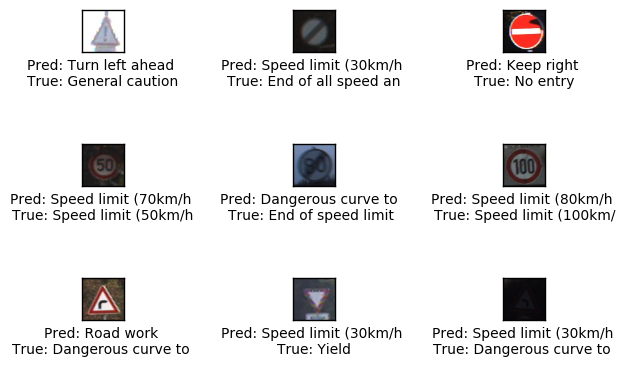



Accuracy on Custom_Testing_Set_Raw_PPM: 0.0% (0 / 100)
Example errors:


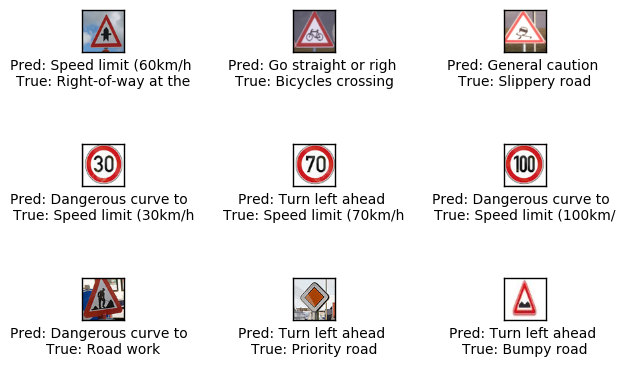

epoch: 0000 mini-batch iteration: 0000 loss= 4.581925 log(loss)= 1.522119 accuracy= 0.030000
epoch: 0000 mini-batch iteration: 0100 loss= 2.227705 log(loss)= 0.800972 accuracy= 0.440000
epoch: 0000 mini-batch iteration: 0200 loss= 1.360030 log(loss)= 0.307506 accuracy= 0.670000
epoch: 0000 mini-batch iteration: 0300 loss= 1.039889 log(loss)= 0.039114 accuracy= 0.780000
total_iterations: 000000 epoch: 0000 avg_loss= 1.779825 avg_log_loss= 0.500049 avg_accuracy= 0.560826 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x113a95ef0>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_PPM | Validation_Set | Number of image filenames vector length: (3920,)
Training_Set_Raw_PPM | Validation_Set | Number of classified labelnames vector length: (43, 2)
Training_Set_Raw_PPM | Validation_Set | Number of image ex

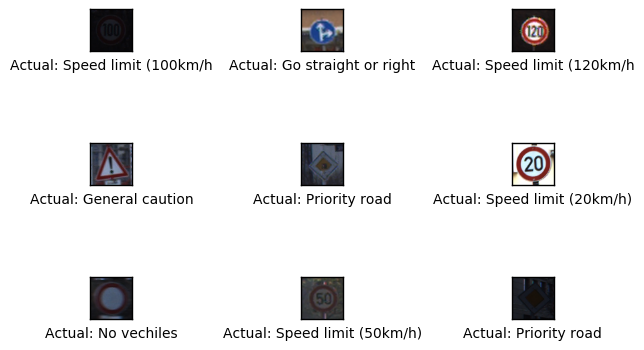

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 77.6% (3042 / 3920)
Iter:      0, Train-Batch Avg Accuracy:  56.1%, Validation Accuracy:  77.6% **
epoch: 0001 mini-batch iteration: 0000 loss= 0.868403 log(loss)= -0.141100 accuracy= 0.830000
epoch: 0001 mini-batch iteration: 0100 loss= 0.577647 log(loss)= -0.548792 accuracy= 0.910000
epoch: 0001 mini-batch iteration: 0200 loss= 0.783283 log(loss)= -0.244262 accuracy= 0.880000
epoch: 0001 mini-batch iteration: 0300 loss= 0.561604 log(loss)= -0.576958 accuracy= 0.870000
total_iterations: 000352 epoch: 0001 avg_loss= 0.678614 avg_log_loss= -0.406343 avg_accuracy= 0.856839 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x112bf4f98>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

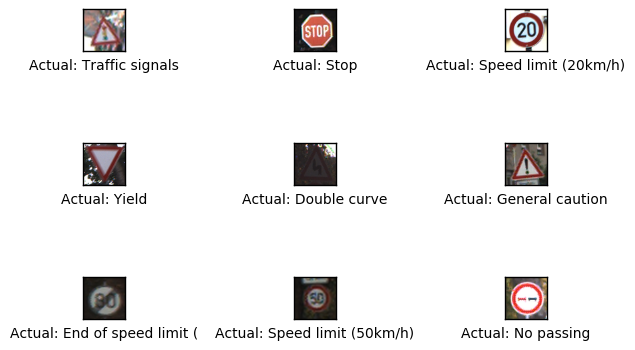

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 88.9% (3483 / 3920)
Iter:    352, Train-Batch Avg Accuracy:  85.7%, Validation Accuracy:  88.9% **
epoch: 0002 mini-batch iteration: 0000 loss= 0.431164 log(loss)= -0.841266 accuracy= 0.920000
epoch: 0002 mini-batch iteration: 0100 loss= 0.424694 log(loss)= -0.856386 accuracy= 0.920000
epoch: 0002 mini-batch iteration: 0200 loss= 0.381665 log(loss)= -0.963211 accuracy= 0.960000
epoch: 0002 mini-batch iteration: 0300 loss= 0.353210 log(loss)= -1.040693 accuracy= 0.940000
total_iterations: 000705 epoch: 0002 avg_loss= 0.399068 avg_log_loss= -0.930093 avg_accuracy= 0.924707 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x117454ef0>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

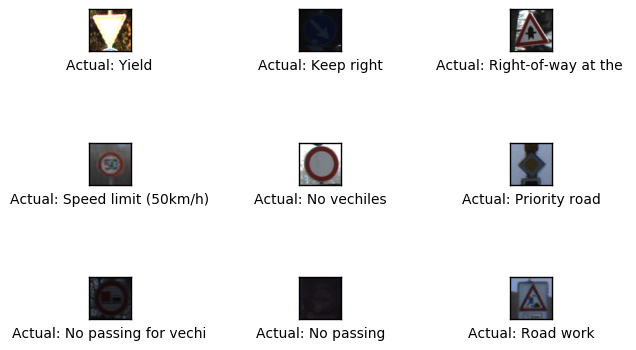

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 92.1% (3609 / 3920)
Iter:    705, Train-Batch Avg Accuracy:  92.5%, Validation Accuracy:  92.1% **
epoch: 0003 mini-batch iteration: 0000 loss= 0.270335 log(loss)= -1.308092 accuracy= 0.940000
epoch: 0003 mini-batch iteration: 0100 loss= 0.213462 log(loss)= -1.544294 accuracy= 0.980000
epoch: 0003 mini-batch iteration: 0200 loss= 0.197913 log(loss)= -1.619930 accuracy= 0.970000
epoch: 0003 mini-batch iteration: 0300 loss= 0.187034 log(loss)= -1.676463 accuracy= 0.980000
total_iterations: 001058 epoch: 0003 avg_loss= 0.273910 avg_log_loss= -1.309630 avg_accuracy= 0.951458 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x121307cf8>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

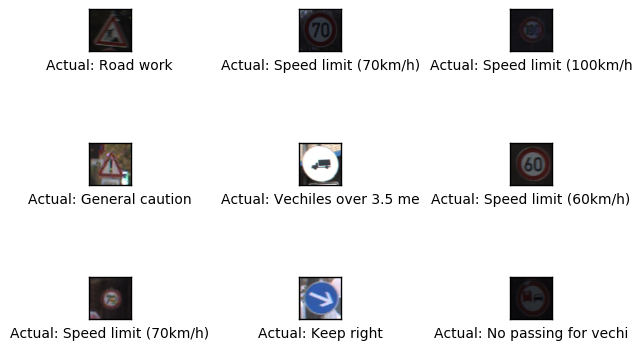

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 93.8% (3677 / 3920)
Iter:   1058, Train-Batch Avg Accuracy:  95.1%, Validation Accuracy:  93.8% **
epoch: 0004 mini-batch iteration: 0000 loss= 0.235915 log(loss)= -1.444286 accuracy= 0.950000
epoch: 0004 mini-batch iteration: 0100 loss= 0.266949 log(loss)= -1.320699 accuracy= 0.940000
epoch: 0004 mini-batch iteration: 0200 loss= 0.230486 log(loss)= -1.467567 accuracy= 0.970000
epoch: 0004 mini-batch iteration: 0300 loss= 0.274964 log(loss)= -1.291115 accuracy= 0.960000
total_iterations: 001411 epoch: 0004 avg_loss= 0.203275 avg_log_loss= -1.610769 avg_accuracy= 0.966647 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x11eee6dd8>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

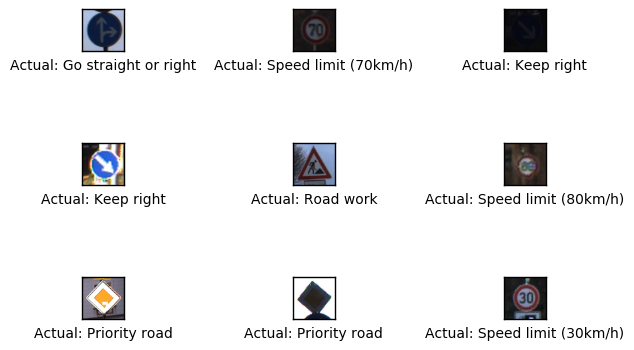

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 95.1% (3728 / 3920)
Iter:   1411, Train-Batch Avg Accuracy:  96.7%, Validation Accuracy:  95.1% **
epoch: 0005 mini-batch iteration: 0000 loss= 0.158012 log(loss)= -1.845083 accuracy= 0.990000
epoch: 0005 mini-batch iteration: 0100 loss= 0.214050 log(loss)= -1.541547 accuracy= 0.960000
epoch: 0005 mini-batch iteration: 0200 loss= 0.134243 log(loss)= -2.008101 accuracy= 0.990000
epoch: 0005 mini-batch iteration: 0300 loss= 0.155592 log(loss)= -1.860520 accuracy= 0.970000
total_iterations: 001764 epoch: 0005 avg_loss= 0.156641 avg_log_loss= -1.878508 avg_accuracy= 0.975091 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x10eb22c18>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

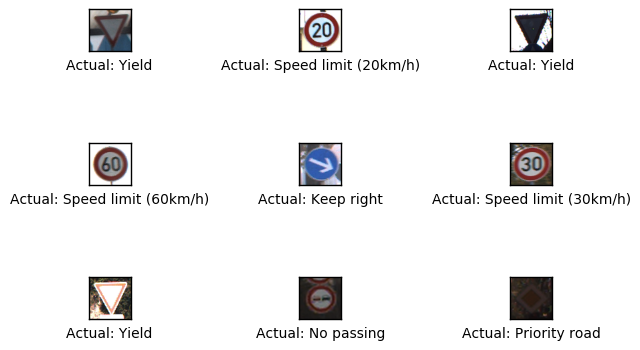

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 96.1% (3769 / 3920)
Iter:   1764, Train-Batch Avg Accuracy:  97.5%, Validation Accuracy:  96.1% **
epoch: 0006 mini-batch iteration: 0000 loss= 0.153108 log(loss)= -1.876614 accuracy= 0.990000
epoch: 0006 mini-batch iteration: 0100 loss= 0.125039 log(loss)= -2.079129 accuracy= 0.980000
epoch: 0006 mini-batch iteration: 0200 loss= 0.129814 log(loss)= -2.041650 accuracy= 1.000000
epoch: 0006 mini-batch iteration: 0300 loss= 0.084491 log(loss)= -2.471109 accuracy= 0.990000
total_iterations: 002117 epoch: 0006 avg_loss= 0.125689 avg_log_loss= -2.105330 avg_accuracy= 0.980305 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x11ff53ef0>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

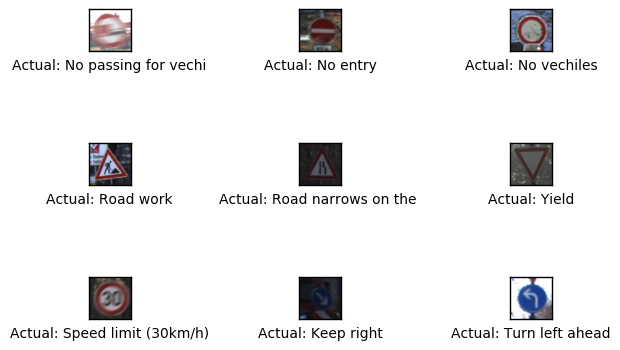

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 96.9% (3799 / 3920)
Iter:   2117, Train-Batch Avg Accuracy:  98.0%, Validation Accuracy:  96.9% **
epoch: 0007 mini-batch iteration: 0000 loss= 0.103607 log(loss)= -2.267146 accuracy= 0.990000
epoch: 0007 mini-batch iteration: 0100 loss= 0.112345 log(loss)= -2.186183 accuracy= 0.980000
epoch: 0007 mini-batch iteration: 0200 loss= 0.125627 log(loss)= -2.074435 accuracy= 0.970000
epoch: 0007 mini-batch iteration: 0300 loss= 0.104211 log(loss)= -2.261336 accuracy= 0.990000
total_iterations: 002470 epoch: 0007 avg_loss= 0.101500 avg_log_loss= -2.324020 avg_accuracy= 0.985265 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x113a01cc0>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

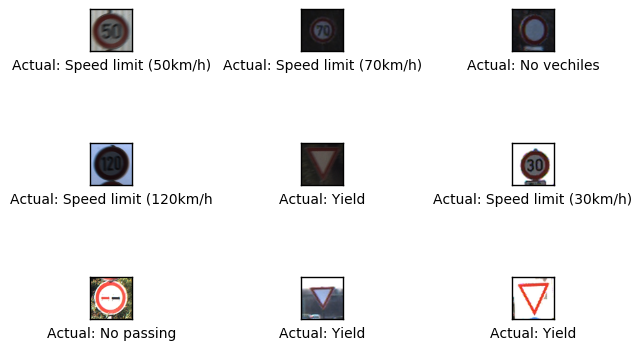

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 97.1% (3805 / 3920)
Iter:   2470, Train-Batch Avg Accuracy:  98.5%, Validation Accuracy:  97.1% **
epoch: 0008 mini-batch iteration: 0000 loss= 0.080226 log(loss)= -2.522910 accuracy= 0.990000
epoch: 0008 mini-batch iteration: 0100 loss= 0.102447 log(loss)= -2.278411 accuracy= 0.990000
epoch: 0008 mini-batch iteration: 0200 loss= 0.053705 log(loss)= -2.924253 accuracy= 1.000000
epoch: 0008 mini-batch iteration: 0300 loss= 0.072852 log(loss)= -2.619324 accuracy= 0.990000
total_iterations: 002823 epoch: 0008 avg_loss= 0.083546 avg_log_loss= -2.521379 avg_accuracy= 0.987872 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x123b70630>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

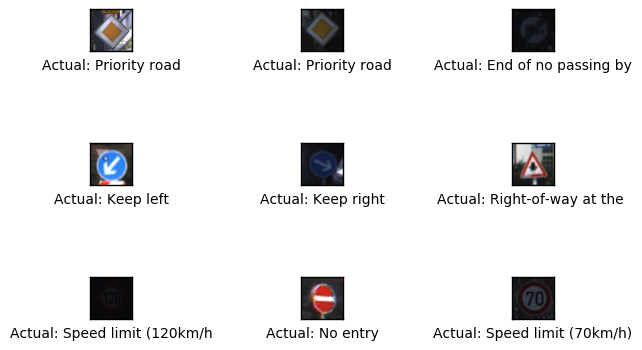

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 97.4% (3817 / 3920)
Iter:   2823, Train-Batch Avg Accuracy:  98.8%, Validation Accuracy:  97.4% **
epoch: 0009 mini-batch iteration: 0000 loss= 0.042941 log(loss)= -3.147935 accuracy= 1.000000
epoch: 0009 mini-batch iteration: 0100 loss= 0.042400 log(loss)= -3.160602 accuracy= 1.000000
epoch: 0009 mini-batch iteration: 0200 loss= 0.048320 log(loss)= -3.029911 accuracy= 1.000000
epoch: 0009 mini-batch iteration: 0300 loss= 0.044635 log(loss)= -3.109235 accuracy= 1.000000
total_iterations: 003176 epoch: 0009 avg_loss= 0.069251 avg_log_loss= -2.708937 avg_accuracy= 0.990479 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x11728ccf8>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

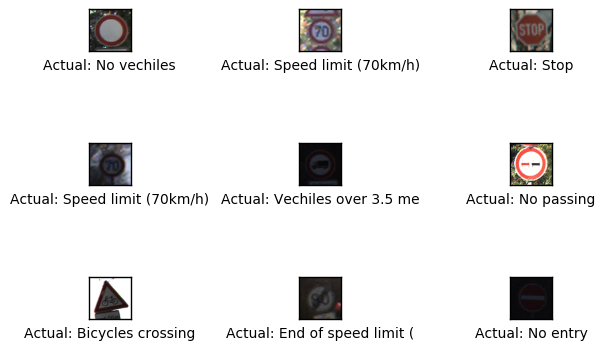

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 97.2% (3809 / 3920)
Iter:   3176, Train-Batch Avg Accuracy:  99.0%, Validation Accuracy:  97.2% 
epoch: 0010 mini-batch iteration: 0000 loss= 0.056770 log(loss)= -2.868747 accuracy= 1.000000
epoch: 0010 mini-batch iteration: 0100 loss= 0.060435 log(loss)= -2.806184 accuracy= 0.990000
epoch: 0010 mini-batch iteration: 0200 loss= 0.073087 log(loss)= -2.616110 accuracy= 0.990000
epoch: 0010 mini-batch iteration: 0300 loss= 0.146735 log(loss)= -1.919127 accuracy= 0.990000
total_iterations: 003528 epoch: 0010 avg_loss= 0.057598 avg_log_loss= -2.904244 avg_accuracy= 0.992236 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x123b835f8>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_PP

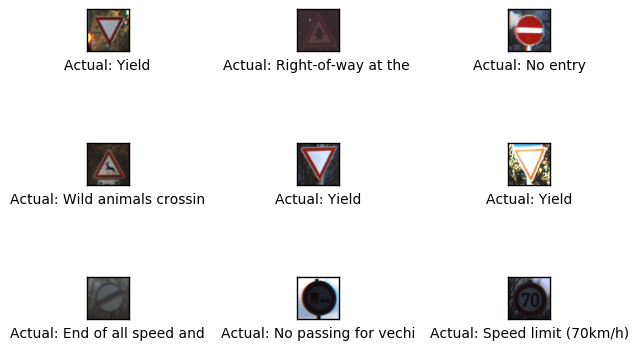

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 97.6% (3826 / 3920)
Iter:   3528, Train-Batch Avg Accuracy:  99.2%, Validation Accuracy:  97.6% **
epoch: 0011 mini-batch iteration: 0000 loss= 0.066180 log(loss)= -2.715384 accuracy= 0.990000
epoch: 0011 mini-batch iteration: 0100 loss= 0.020258 log(loss)= -3.899227 accuracy= 1.000000
epoch: 0011 mini-batch iteration: 0200 loss= 0.057313 log(loss)= -2.859236 accuracy= 0.990000
epoch: 0011 mini-batch iteration: 0300 loss= 0.053023 log(loss)= -2.937034 accuracy= 0.990000
total_iterations: 003881 epoch: 0011 avg_loss= 0.048445 avg_log_loss= -3.076086 avg_accuracy= 0.993256 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x11843ca58>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

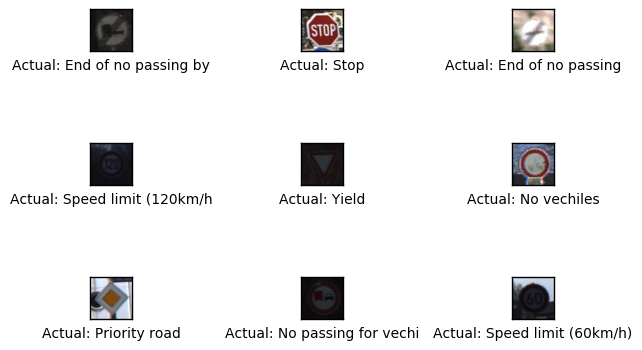

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 97.7% (3830 / 3920)
Iter:   3881, Train-Batch Avg Accuracy:  99.3%, Validation Accuracy:  97.7% **
epoch: 0012 mini-batch iteration: 0000 loss= 0.025556 log(loss)= -3.666897 accuracy= 1.000000
epoch: 0012 mini-batch iteration: 0100 loss= 0.027362 log(loss)= -3.598612 accuracy= 1.000000
epoch: 0012 mini-batch iteration: 0200 loss= 0.057128 log(loss)= -2.862456 accuracy= 0.990000
epoch: 0012 mini-batch iteration: 0300 loss= 0.035147 log(loss)= -3.348218 accuracy= 1.000000
total_iterations: 004234 epoch: 0012 avg_loss= 0.040774 avg_log_loss= -3.255174 avg_accuracy= 0.994588 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x120c5cc18>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

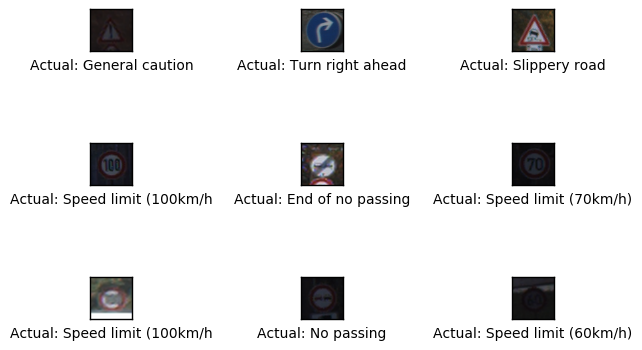

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 97.9% (3836 / 3920)
Iter:   4234, Train-Batch Avg Accuracy:  99.5%, Validation Accuracy:  97.9% **
epoch: 0013 mini-batch iteration: 0000 loss= 0.033117 log(loss)= -3.407696 accuracy= 0.990000
epoch: 0013 mini-batch iteration: 0100 loss= 0.016998 log(loss)= -4.074668 accuracy= 1.000000
epoch: 0013 mini-batch iteration: 0200 loss= 0.057029 log(loss)= -2.864203 accuracy= 0.980000
epoch: 0013 mini-batch iteration: 0300 loss= 0.022501 log(loss)= -3.794178 accuracy= 1.000000
total_iterations: 004587 epoch: 0013 avg_loss= 0.034447 avg_log_loss= -3.427872 avg_accuracy= 0.995154 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x124bbc6d8>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

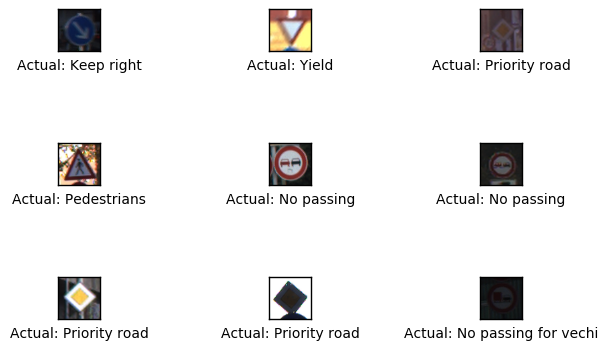

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 97.8% (3835 / 3920)
Iter:   4587, Train-Batch Avg Accuracy:  99.5%, Validation Accuracy:  97.8% 
epoch: 0014 mini-batch iteration: 0000 loss= 0.030317 log(loss)= -3.496047 accuracy= 0.990000
epoch: 0014 mini-batch iteration: 0100 loss= 0.016299 log(loss)= -4.116645 accuracy= 1.000000
epoch: 0014 mini-batch iteration: 0200 loss= 0.022121 log(loss)= -3.811226 accuracy= 1.000000
epoch: 0014 mini-batch iteration: 0300 loss= 0.022254 log(loss)= -3.805232 accuracy= 1.000000
total_iterations: 004940 epoch: 0014 avg_loss= 0.029211 avg_log_loss= -3.587605 avg_accuracy= 0.995863 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x1256c9940>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_PP

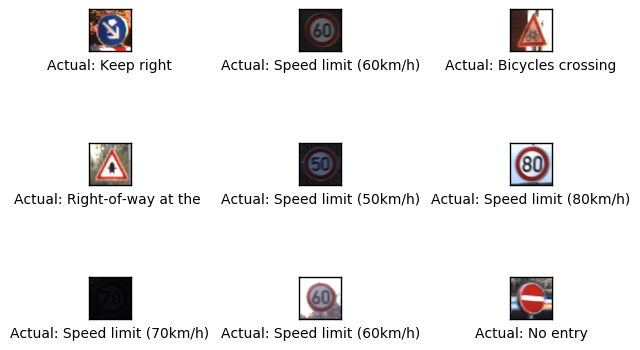

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 98.1% (3845 / 3920)
Iter:   4940, Train-Batch Avg Accuracy:  99.6%, Validation Accuracy:  98.1% **
epoch: 0015 mini-batch iteration: 0000 loss= 0.022665 log(loss)= -3.786926 accuracy= 1.000000
epoch: 0015 mini-batch iteration: 0100 loss= 0.044277 log(loss)= -3.117280 accuracy= 0.990000
epoch: 0015 mini-batch iteration: 0200 loss= 0.014697 log(loss)= -4.220130 accuracy= 1.000000
epoch: 0015 mini-batch iteration: 0300 loss= 0.024075 log(loss)= -3.726602 accuracy= 1.000000
total_iterations: 005293 epoch: 0015 avg_loss= 0.024886 avg_log_loss= -3.750274 avg_accuracy= 0.996401 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x1213a7d30>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

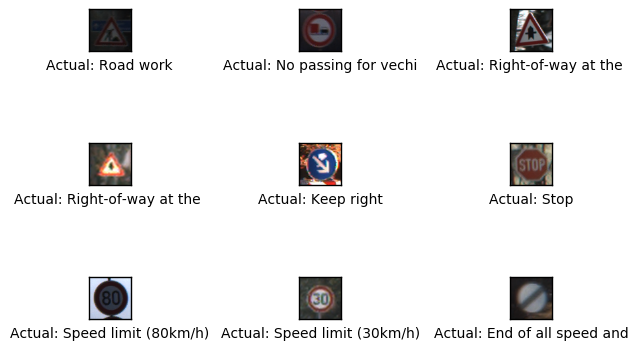

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 98.0% (3841 / 3920)
Iter:   5293, Train-Batch Avg Accuracy:  99.6%, Validation Accuracy:  98.0% 
epoch: 0016 mini-batch iteration: 0000 loss= 0.030280 log(loss)= -3.497264 accuracy= 1.000000
epoch: 0016 mini-batch iteration: 0100 loss= 0.008791 log(loss)= -4.734055 accuracy= 1.000000
epoch: 0016 mini-batch iteration: 0200 loss= 0.028418 log(loss)= -3.560723 accuracy= 1.000000
epoch: 0016 mini-batch iteration: 0300 loss= 0.021926 log(loss)= -3.820096 accuracy= 1.000000
total_iterations: 005646 epoch: 0016 avg_loss= 0.021221 avg_log_loss= -3.911873 avg_accuracy= 0.996656 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x124bf4e10>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_PP

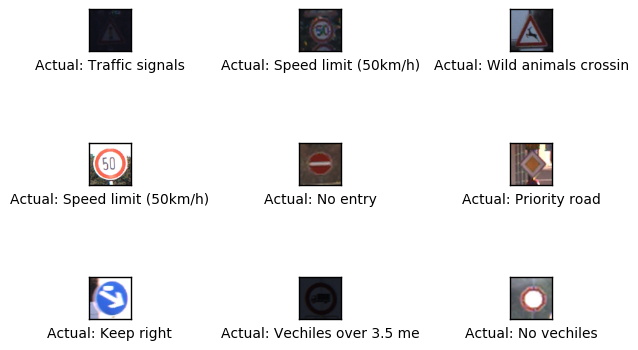

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 98.2% (3848 / 3920)
Iter:   5646, Train-Batch Avg Accuracy:  99.7%, Validation Accuracy:  98.2% **
epoch: 0017 mini-batch iteration: 0000 loss= 0.022751 log(loss)= -3.783160 accuracy= 1.000000
epoch: 0017 mini-batch iteration: 0100 loss= 0.017342 log(loss)= -4.054639 accuracy= 1.000000
epoch: 0017 mini-batch iteration: 0200 loss= 0.010999 log(loss)= -4.509964 accuracy= 1.000000
epoch: 0017 mini-batch iteration: 0300 loss= 0.017140 log(loss)= -4.066330 accuracy= 1.000000
total_iterations: 005999 epoch: 0017 avg_loss= 0.018287 avg_log_loss= -4.071910 avg_accuracy= 0.996770 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x12576add8>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

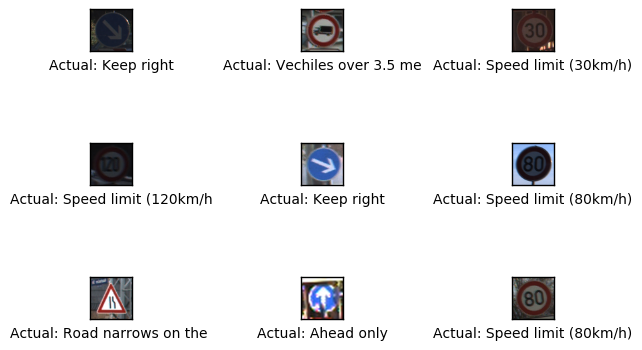

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 98.4% (3856 / 3920)
Iter:   5999, Train-Batch Avg Accuracy:  99.7%, Validation Accuracy:  98.4% **
epoch: 0018 mini-batch iteration: 0000 loss= 0.012390 log(loss)= -4.390854 accuracy= 1.000000
epoch: 0018 mini-batch iteration: 0100 loss= 0.012542 log(loss)= -4.378684 accuracy= 1.000000
epoch: 0018 mini-batch iteration: 0200 loss= 0.014761 log(loss)= -4.215753 accuracy= 1.000000
epoch: 0018 mini-batch iteration: 0300 loss= 0.012919 log(loss)= -4.349072 accuracy= 1.000000
total_iterations: 006352 epoch: 0018 avg_loss= 0.015543 avg_log_loss= -4.223557 avg_accuracy= 0.996996 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x1255bdef0>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_

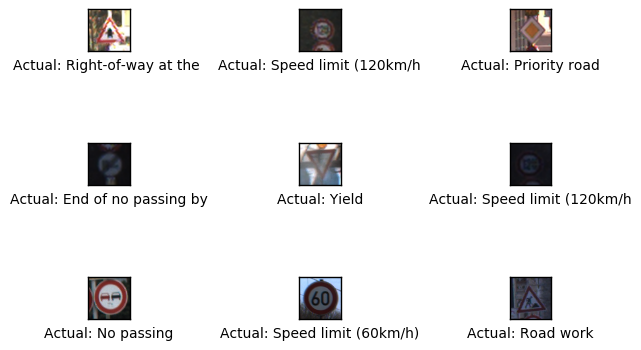

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 98.4% (3856 / 3920)
Iter:   6352, Train-Batch Avg Accuracy:  99.7%, Validation Accuracy:  98.4% 
epoch: 0019 mini-batch iteration: 0000 loss= 0.010333 log(loss)= -4.572456 accuracy= 1.000000
epoch: 0019 mini-batch iteration: 0100 loss= 0.010283 log(loss)= -4.577288 accuracy= 1.000000
epoch: 0019 mini-batch iteration: 0200 loss= 0.012148 log(loss)= -4.410619 accuracy= 1.000000
epoch: 0019 mini-batch iteration: 0300 loss= 0.013827 log(loss)= -4.281097 accuracy= 1.000000
total_iterations: 006704 epoch: 0019 avg_loss= 0.013260 avg_log_loss= -4.383588 avg_accuracy= 0.997195 


Dataset: " Training_Set_Raw_PPM | Validation_Set " successfully loaded to memory location: <__main__.DataSet object at 0x1255c4160>
Training_Set_Raw_PPM | Validation_Set | Images tensor shape: (3920, 64, 64, 3)
Training_Set_Raw_PPM | Validation_Set | Labels vector length: (3920,)
Training_Set_Raw_PP

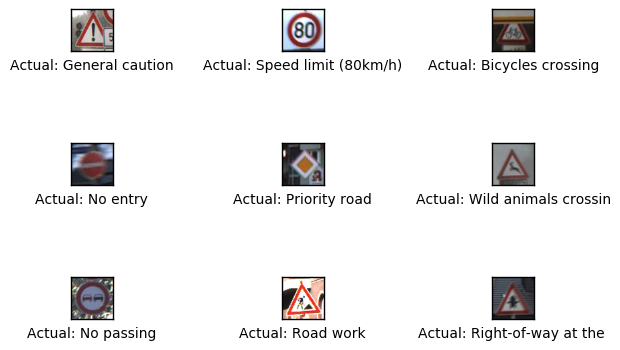

Loading report for Training_Set_Raw_PPM | Validation_Set concluded.


Accuracy on Training_Set_Raw_PPM | Validation_Set: 97.9% (3838 / 3920)
No improvement found in a while, stopping optimization.
model saved to traffic-signs-data/datacache/model.ckpt
Finished Training with training_set/validation_set, now test against testing_set after optimization.


Accuracy on Testing_Set_Raw_PPM: 89.6% (11321 / 12630)
Example errors:


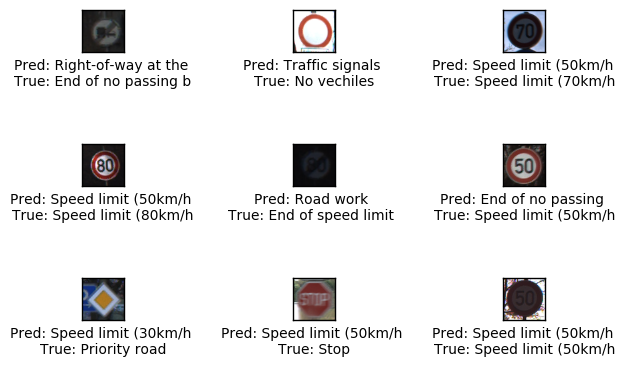



Accuracy on Custom_Testing_Set_Raw_PPM: 45.0% (45 / 100)
Example errors:


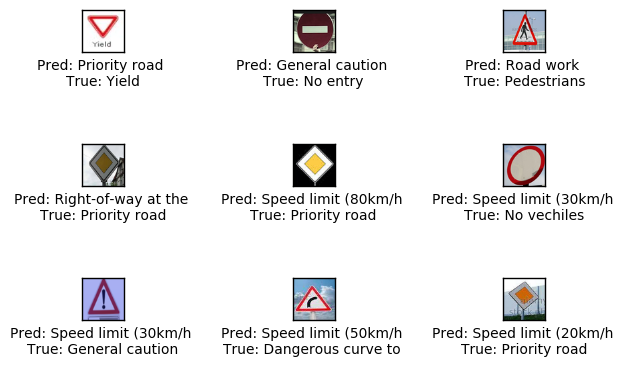

Time usage: 9:35:57


In [14]:
optimize(training_set=training_set, testing_sets=testing_sets, num_epochs=20)

---

### Step 3: Test a Model on <font color='red'> New</font> Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

##### <font color='red'> Question 6 - Done</font> ###

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



** <font color='blue'> Answer:</font> ** See Custom_Test_Set Report above. I used a custom testing_set of 100 images. These images were screen captures of Google images that I found while searching for European road signs. 

I purposefully selected a very difficult test_set (included in github repo as a zip file). I wanted to test for the classifier's ability to generalize. While my accuracy was not great (50% on average), I believe the network still has much room for growth.

The images I used where what I can recognize as traffic signs but I also used a small portion 5-10% of the dataset were images that I expected the classifier to get wrong as they signs were slight variations on the existing signs. For example, the 'slippery road'signs I found slight variations of the sign (possibly due to different iterations or different countries in Europe) I wanted to include that to see how the classifier stacked up. I found that it did somewhat poorly on these difficult classifications.

The 50% can also be attributed in part to human error. That is to say I might have mislabeled a few 3-5 images in the Dataset, so there's a possiblity of Type 2 Errors here. 

##### 100 New Images are Tested on Model above in the Custom_Testing_Set DataSet object.

##### <font color='red'> Question 7 - Done</font> ###

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


** <font color='blue'> Answer:</font> ** I believe so, I tested my network on two Dataset (preprocessed vs. source images). To accomplish this, my architecture downloads, extracts, and preprocesses all the data from either the Udacity provided link or directly from the GTSRB website. Before loading it into my nueral network model. It is capable of resizing images and with a few tweaks, I could implement cropping as well!

I believe if the video was split into a Dataset of multiple frames for example, I could tweak the input paramters to accept a video stream. As long as the stream can be reshaped to visual images, it can use my architecture. 

##### <font color='red'> Question 8 - Done</font> ###

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [tf.nn.top_k](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)* tf.nn.top_k will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:
##### (5, 6) array
    a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
             0.12789202],
           [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
             0.15899337],
           [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
             0.23892179],
           [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
             0.16505091],
           [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
             0.09155967]])
    Running it through sess.run(tf.nn.top_k(tf.constant(a), k=3)) produces:
    TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
           [ 0.28086119,  0.27569815,  0.18063401],
           [ 0.26076848,  0.23892179,  0.23664738],
           [ 0.29198961,  0.26234032,  0.16505091],
           [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
           [0, 1, 4],
           [0, 5, 1],
           [1, 3, 5],
           [1, 4, 3]], dtype=int32))

Looking just at the first row we get [ 0.34763842,  0.24879643,  0.12789202], you can confirm these are the 3 largest probabilities in a. You'll also notice [3, 0, 5] are the corresponding indices."

** <font color='blue'> Answer:</font> ** 
This visualization makes sense. Here's how I visualize the softmax and top_k:

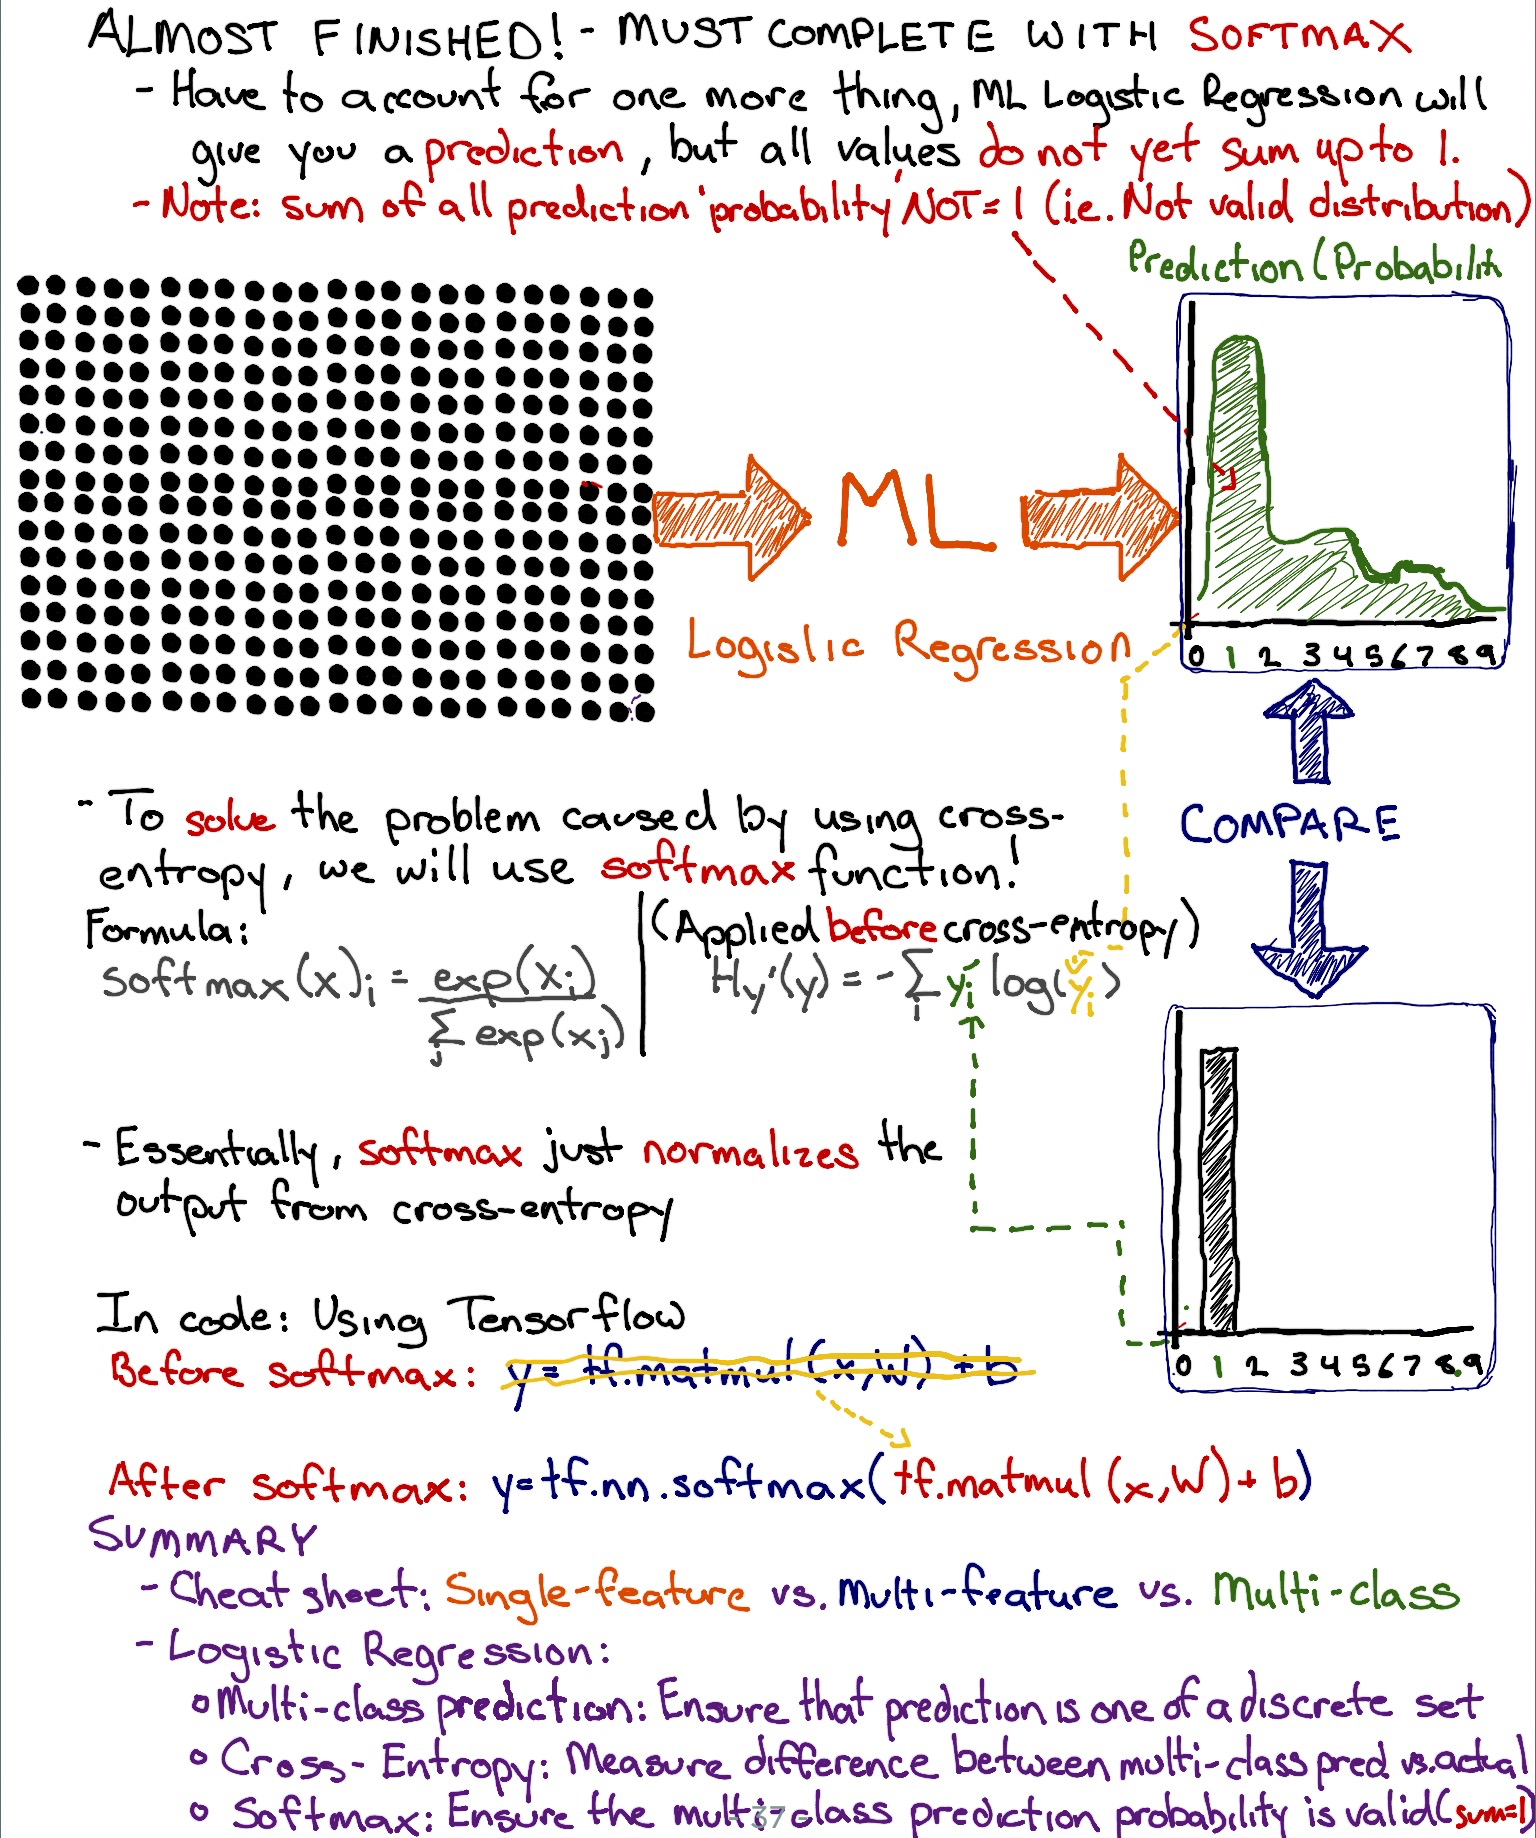

In [15]:
from IPython.display import Image
Image('softmax_prediction_flowchart.jpeg')

In [16]:
### Softmax and top_k implemented above, please see implementation below
print(""" 
for i in range(total_batch):
     #Because bothe the training and test set are utilizing the same tf session, I use the same batch_size
     batch_images, batch_labels = testing_set.next_batch(self.batch_size, with_label = True)
     one_hot_batch_labels = self.to_one_hot(batch_labels)

     # Get the correct batch of testing examples.
     batch_start = (i)*self.batch_size
     batch_end = min((i+1)*self.batch_size, testing_set.num_examples)

     # Create a feed-dict with these images and labels.
     feed_dict={self.batch: batch_images, self.batch_labels: one_hot_batch_labels}

     # Calculate the predicted class using TensorFlow.
     prediction[batch_start:batch_end] = self.sess.run(tf.argmax(self.predict, dimension=1),
                                                     feed_dict=feed_dict)

# I did not want to using sess.run and build a feed_dict, so I used numpy, 
# # Create a boolean array whether each image is correctly classified.
# correct_prediction = tf.nn.in_top_k(prediction, self.to_one_hot(testing_set.labels), 1)

# # Calculate the number of correctly classified images.
# correct_sum = tf.reduce_sum(tf.cast(correct_prediction, tf.int32))

# # Classification accuracy is the number of correctly classified
# accuracy = correct_sum / testing_set.num_examples

# Create a boolean array whether each image is correctly classified.
correct_prediction = (testing_set.labels == prediction)

# Calculate the number of correctly classified images.
correct_sum = np.sum(correct_prediction)

# Classification accuracy is the number of correctly classified
accuracy = correct_sum / testing_set.num_examples
""")

 
for i in range(total_batch):
     #Because bothe the training and test set are utilizing the same tf session, I use the same batch_size
     batch_images, batch_labels = testing_set.next_batch(self.batch_size, with_label = True)
     one_hot_batch_labels = self.to_one_hot(batch_labels)

     # Get the correct batch of testing examples.
     batch_start = (i)*self.batch_size
     batch_end = min((i+1)*self.batch_size, testing_set.num_examples)

     # Create a feed-dict with these images and labels.
     feed_dict={self.batch: batch_images, self.batch_labels: one_hot_batch_labels}

     # Calculate the predicted class using TensorFlow.
     prediction[batch_start:batch_end] = self.sess.run(tf.argmax(self.predict, dimension=1),
                                                     feed_dict=feed_dict)

# I did not want to using sess.run and build a feed_dict, so I used numpy, 
# # Create a boolean array whether each image is correctly classified.
# correct_prediction = tf.nn.in_top_k(pr

**Example Output of Accuracy:**

In [17]:
print("""
Accuracy on Training_Set_Raw_PPM | Validation_Set: 94.9% (3722 / 3920)
Iter:   4940, Train-Batch Avg Accuracy:  97.9%, Validation Accuracy:  94.9% 
epoch: 0016 mini-batch iteration: 0000 loss= 0.137990 accuracy= 0.980000
epoch: 0016 mini-batch iteration: 0100 loss= 0.213917 accuracy= 0.960000
epoch: 0016 mini-batch iteration: 0200 loss= 0.149518 accuracy= 0.990000
epoch: 0016 mini-batch iteration: 0300 loss= 0.117917 accuracy= 0.990000
epoch: 0016 avg_loss= 0.137137 avg_accuracy= 0.980674
""")


Accuracy on Training_Set_Raw_PPM | Validation_Set: 94.9% (3722 / 3920)
Iter:   4940, Train-Batch Avg Accuracy:  97.9%, Validation Accuracy:  94.9% 
epoch: 0016 mini-batch iteration: 0000 loss= 0.137990 accuracy= 0.980000
epoch: 0016 mini-batch iteration: 0100 loss= 0.213917 accuracy= 0.960000
epoch: 0016 mini-batch iteration: 0200 loss= 0.149518 accuracy= 0.990000
epoch: 0016 mini-batch iteration: 0300 loss= 0.117917 accuracy= 0.990000
epoch: 0016 avg_loss= 0.137137 avg_accuracy= 0.980674



##### <font color='red'> Question 9 - Done</font> ###

_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


** <font color='blue'> Answer:</font> **
- Used this tutorial as a skeleton starting point: https://github.com/Hvass-Labs/TensorFlow-Tutorials
    - I changed the architecture quite substantially, for example, I use more ConvNets and I use leaky relu. 
- Used this online lecture class for theory: https://cs231n.github.io/
    - I learned about the state of the art and modeled my architecture on many of the principles.

###### > **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.